## 1. Introduction <a class="anchor" id="sec_1"></a>

Garment industry or clothing industry involves a large amount of processses that are handled manually. It is desriable for the management teams to predict the productivity, based on the analysis of the collected data, to satisfy the demands around the globe due to rise in globalization.

This project will analyze the given dataset with 1197 records that contains 15 columns, and predict the actual productivity using linear regression. There are three main session in this assignments: EDA (exploratory data analysis), model development, and discussion on the results. In EDA, analysis on the attributes themeselves and the relationships between them will be performed. While several linear regression models will be developed, tested, and comapred in the later sessions.

## 2. Exploratory Data Analysis<a class="anchor" id="sec_3"></a>

### 2.1 Importing Libraries

In [1]:
library(tidyverse) #essential r
library(dplyr) #essential r
library(lubridate) #for date-related function
library(ggplot2) #ggplot graphic
library(reshape2) #wide to long
library(psych) #statistics describe
library(lattice) #levelplot
library(car) #outliertest
library(grid) #combine ggplot
library(gridExtra) #combine ggplot
library(leaps) #subset selection
library(modelr) #compute rmse, mae, r2
library(caret) #cross-validation

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths


Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha

Loading required package: carData
Warning message:
"package 'carData'

### 2.2 Importing data

In [2]:
raw_data <- read_csv('./garments_empolyee_productivity.csv')
head(raw_data)

Parsed with column specification:
cols(
  date = col_date(format = ""),
  quarter = col_character(),
  department = col_character(),
  day = col_character(),
  team = col_double(),
  targeted_productivity = col_double(),
  smv = col_double(),
  wip = col_double(),
  over_time = col_double(),
  incentive = col_double(),
  idle_time = col_double(),
  idle_men = col_double(),
  no_of_style_change = col_double(),
  no_of_workers = col_double(),
  actual_productivity = col_double()
)


date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108,7080,98,0,0,0,59.0,0.9407254
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,861,960,0,0,0,0,8.0,0.8865000
2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968,3660,50,0,0,0,30.5,0.8005705
2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968,3660,50,0,0,0,30.5,0.8005705
2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170,1920,50,0,0,0,56.0,0.8003819
2015-01-01,Quarter1,sweing,Thursday,7,0.80,25.90,984,6720,38,0,0,0,56.0,0.8001250


The message above tells that there are 15 attributes in total where one is date type, three are character type, and the rest is double (numeric) type. This can be also visualized from the dataframe itself. There will be a step encoding the non-numeric attributes so that they can be included for modelling.

In [3]:
#rename some columns
raw_data <- raw_data %>% rename('targeted_prod' = 'targeted_productivity',
                               'n_change' = 'no_of_style_change',
                               'n_worker' = 'no_of_workers',
                               'actual_prod' = 'actual_productivity')

### 2.3 Description Summary

**Attribute Descriptions (copied from original website)**

01. date: Date in MM-DD-YYYY
02. quarter: A portion of the month. A month was divided into four quarters
03. department: Associated department with the instance
04. day: Day of the Week
05. team: Associated team number with the instance
06. targeted_prod: Targeted productivity set by the Authority for each team for each day
07. smv: Standard Minute Value, it is the allocated time for a task
08. wip: Work in progress which includes the number of unfinished items for products
09. over_time: Represents the amount of overtime by each team in minutes
10. incentive: Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
11. idle_time: The amount of time when the production was interrupted due to several reasons
12. idle_men: The number of workers who were idle due to production interruption
13. no_change: Number of changes in the style of a particular product
14. no_worker: Number of workers in each team
15. actual_prod: The actual percentage productivity that was delivered by the workers which ranges from 0 to 1

In [4]:
summary(raw_data)

      date              quarter           department            day           
 Min.   :2015-01-01   Length:1197        Length:1197        Length:1197       
 1st Qu.:2015-01-18   Class :character   Class :character   Class :character  
 Median :2015-02-03   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2015-02-04                                                           
 3rd Qu.:2015-02-23                                                           
 Max.   :2015-03-11                                                           
      team        targeted_prod         smv             wip       
 Min.   : 1.000   Min.   :0.0700   Min.   : 2.90   Min.   :    7  
 1st Qu.: 3.000   1st Qu.:0.7000   1st Qu.: 3.94   1st Qu.:  734  
 Median : 6.000   Median :0.7500   Median :15.26   Median : 1006  
 Mean   : 6.427   Mean   :0.7296   Mean   :15.06   Mean   : 1094  
 3rd Qu.: 9.000   3rd Qu.:0.8000   3rd Qu.:24.26   3rd Qu.: 1233  
 Max.   :12.000   Max.   :0.8000   Max.   :54

**From the statistics summary**

1. Data is 1197 by 15 as given by the assignment description
2. Data is between 01 Jan 2015 and 11 Mar 2015 meaning year information is constant
3. The maximum value of 'actual_productivity' of 1.1204 exceeds the predescriptive value of 1

According to the assignment description, the data is assumed to be cleaned and no further wrangling is required. Hence, there will be no step addressing the third point mentioned. In order to understand better for the date and character attributes, it will be better to encode/convert them into numeric values.

### 2.4 Data Pre-processing

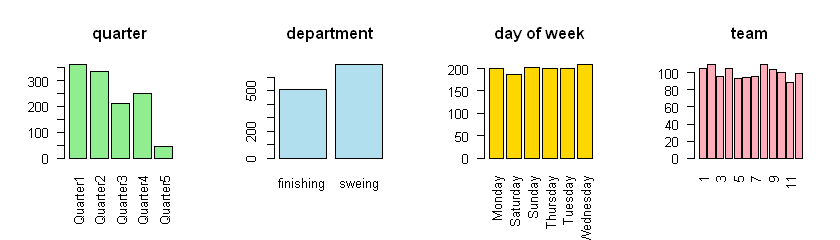

In [5]:
#plot the factor variables
options(repr.plot.width=7, repr.plot.height=2)
par(mfrow=c(1,4))
barplot(table(raw_data$quarter), main='quarter', cex.names = 1, las = 2, col='lightgreen')
barplot(table(raw_data$department), main='department', col='lightblue2')
barplot(table(raw_data$day), main='day of week', cex.names = 1, las = 2, col='gold1')
barplot(table(raw_data$team), main='team', cex.names = 1, las = 2, col='lightpink1')

**From the barcharts:**

1. There are 5 quarters in total which has conflict with the predescription of 4
2. There are 2 departments: finishing and sweing
3. There are 6 weekdays where Friday does not appear (perhaps day-off on Friday).
4. There are 12 teams in total

In [6]:
#convert the columns to factor type
day_of_week <- c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday')
data <- raw_data %>% mutate(quarter=as.factor(quarter), department=as.factor(department),
                            day=factor(day, levels=day_of_week, labels=c(1:4,6,7)),
                            team=as.factor(team))

As 'quarter', 'deparment', 'day' and 'team' can be seen as categorical, their types are converted into factor. The order of 'day' is assigned for convenience. For exmaple, 1 represents Monday and 6 represents Saturday.

In [7]:
#extract the month and day information
data <- data %>% mutate(month=month(date), mday=mday(date))

Information of month and day of month is extracted from attribute 'date'. Information of year is not extracted as there is only one year in this dataset which is 2015, meaning that including year is just adding a constant variable.

Maximum mday is 31

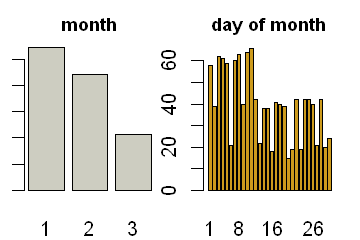

In [8]:
#plot the barcharts for month and day
options(repr.plot.width=3, repr.plot.height=2)
par(mfrow=c(1,2), mar=c(2,1,2,1))
barplot(table(data$month), main='month', cex.main=.9, col='ivory3')
barplot(table(data$mday), main='day of month', cex.main=.9, col='goldenrod3')
cat('Maximum mday is', max(data$mday))

According to the barplots, there are only 3 months: January to March. The maximum day of month recorded is 31 which is probably in January. It will be more approparite to convert 'mday' into its periodic function as it contains 31 categories if converted to factor. While month will be converted to factor as there are only 3 not 12 repeated. Hence:

In [9]:
#convert month to factor and mday to sine and cosine forms
data <- data %>% mutate(month=as.factor(month),
                     sin_mday=sin(2*pi*mday/31),
                     cos_mday=cos(2*pi*mday/31))

### 2.5 Univariate Analysis

Below the dataframe will be reordered and the 'date' column will be removed as the date information is extracted.

In [10]:
data <- data[c(2:14, 16, 18, 19, 15)]
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
quarter*,1,1197,2.399332e+00,1.215535e+00,2.00000000,2.328467e+00,1.4826000,1.0000000,5.000000e+00,4.000000,0.385514259,-1.0647975,0.035133409
department*,2,1197,1.577277e+00,4.941987e-01,2.00000000,1.596455e+00,0.0000000,1.0000000,2.000000e+00,1.000000,-0.312473355,-1.9039489,0.014284155
day*,3,1197,3.487051e+00,1.707511e+00,3.00000000,3.483837e+00,1.4826000,1.0000000,6.000000e+00,5.000000,0.025102464,-1.2607862,0.049353321
team*,4,1197,6.426901e+00,3.463963e+00,6.00000000,6.415016e+00,4.4478000,1.0000000,1.200000e+01,11.000000,0.009822836,-1.2267742,0.100121237
targeted_prod,5,1197,7.296324e-01,9.789096e-02,0.75000000,7.501043e-01,0.0741300,0.0700000,8.000000e-01,0.730000,-2.138779217,5.5709319,0.002829408
smv,6,1197,1.506217e+01,1.094322e+01,15.26000000,1.438029e+01,16.4716860,2.9000000,5.456000e+01,51.660000,0.404919918,-0.8007152,0.316299149
wip,7,1197,1.093720e+03,1.424553e+03,1006.00000000,9.956163e+02,381.0282000,7.0000000,2.312200e+04,23115.000000,12.202427499,165.9308559,41.174797019
over_time,8,1197,4.567460e+03,3.348824e+03,3960.00000000,4.290396e+03,4091.9760000,0.0000000,2.592000e+04,25920.000000,0.671600798,0.4118775,96.793276585
incentive,9,1197,3.821053e+01,1.601826e+02,0.00000000,2.202920e+01,0.0000000,0.0000000,3.600000e+03,3600.000000,15.751192254,297.2774763,4.629865550
idle_time,10,1197,7.301587e-01,1.270976e+01,0.00000000,0.000000e+00,0.0000000,0.0000000,3.000000e+02,300.000000,20.493961614,440.0451772,0.367358553


1. All attributes except for 'sin_mday' and 'cos_mday' have positive values.
2. There are significant skewness exhibited by some attributes such as 'wip', 'incentive', and 'idle_time'. While a normal distribution has skewness of 0. This means that some attributes are either left or right skewed, and transformation may be required to address the issues.
3. There are significant kurtosis exhibited by some attributes, either leptokurtic or platykurtic. Leptokurtic distribution is more narrow than a normal distribution, while platykurtic is flatter. This indicates that the attributes may contains some extreme values, and may affect the regression.
4. Attribute 'over_time' followed by 'wip' has the highest mean and range, and the values are much higher than the other attributes. This could mean that their coefficients of the regression equation may have some order of difference than others.
5. Attribute 'over_time' followed by 'wip' has the highest standard deviations meaning that their points are more spread out from their means.
6. For 'actual_prod', the mean is 0.7351 and the standard deviation is 0.1745. This means that even the error between predicted value and the actual value can be considered high even if it is 0.1. Its skewness is -0.805, indicating that it is slightly left skewed. Its kurtosis is 0.321, implying that it has more weighting on the middle part of its distribution.

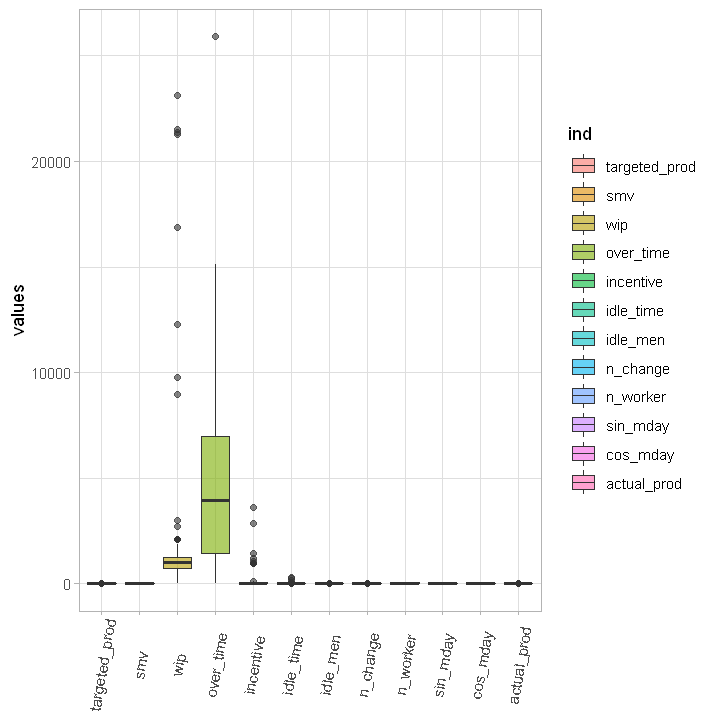

In [11]:
#plot the boxplots of all attributes and compare
options(repr.plot.width=6, repr.plot.height=6)
ggplot(stack(data[c(-1:-4, -14)]), aes(x=ind, y=values, fill=ind)) + 
geom_boxplot(alpha=.6) + theme_light() +
theme(axis.text.x = element_text(angle = 80, vjust = 0.5, hjust = 0.5), axis.title.x = element_blank())

After excluding the categorical/factor attributes, the boxplots are plotted for all other attributes. It can be observe that there are certain amount of extreme values exhibited by 'wip', 'over_time', and 'incentive'. This could explain that why the standard deviations of these attirbutes are so high compared to the others.

In [12]:
#define function to plot the histograms and boxplots of all attributes separately
plot_box_hist <- function(dataframe, nrow){
    options(repr.plot.width=8, repr.plot.height=2)
    par(mfrow = c(nrow,8), mar=c(1,1,1,1))
    for (i in names(dataframe)) {
        boxplot(dataframe[[i]], main = i, type='l', col = 'orange')
    }
    
    par(mfrow = c(nrow,8), mar=c(2,1,1,1))
    for (i in names(dataframe)){
        hist(dataframe[[i]], main=i, col='cyan3')
    }
}

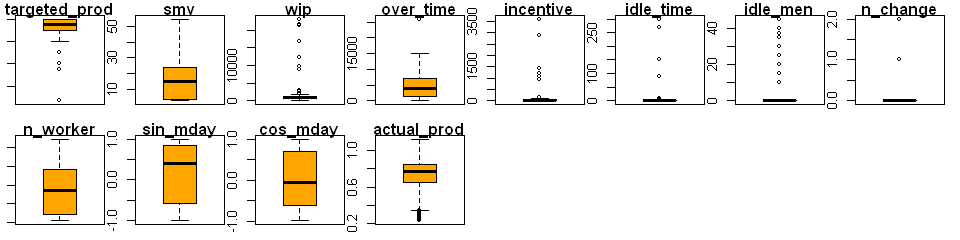

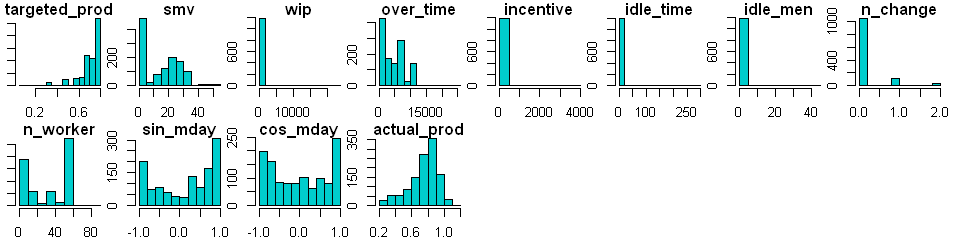

In [13]:
plot_box_hist(data[c(-1:-4, -14)],2)

1. 'targeted_prod' and 'actual_prod' have some extreme values below its minimum in the boxplot.
2. 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men' and 'n_change' contain some extreme values above their maximum in the boxplots.
3. 'targeted_prod' is highly left skewed, and 'actual_prod' is slightly left skewed.
4. The distributions of 'wip', 'incentive', 'idle_time', 'idle_men' and 'n_change' exhibit a pattern like highly right skewed unimodal distribution.
5. 'over_time' is right skewed.
6. The distribution of 'n_worker', 'sin_mday' and 'cos_mday' exhibit some bimodal features. However, it is expected for 'sin_mday' and 'cos_mday' as they are periodic between -1 and 1.

As observed and discussed that most of the attributes are not normally distributed. It is interested to investigate if transformation of them can yield some normalization. The transformations applying will be log and square-root transformations. These two transformation are often used to reduce the skewness and some nonlinearity within the variables.

In [14]:
#define function for transformation
transformation <- function(dataframe, attribute){
    col_index <- which(colnames(dataframe)==attribute)
    hist(dataframe[[col_index]], main=attribute, col='mediumpurple1')
    hist(log(dataframe[[col_index]]+1, 10), main=paste0('log(',attribute,')'), col='khaki2')
    hist(sqrt(dataframe[[col_index]]), main=paste0('sqrt(',attribute,')'), col='plum1')
    }

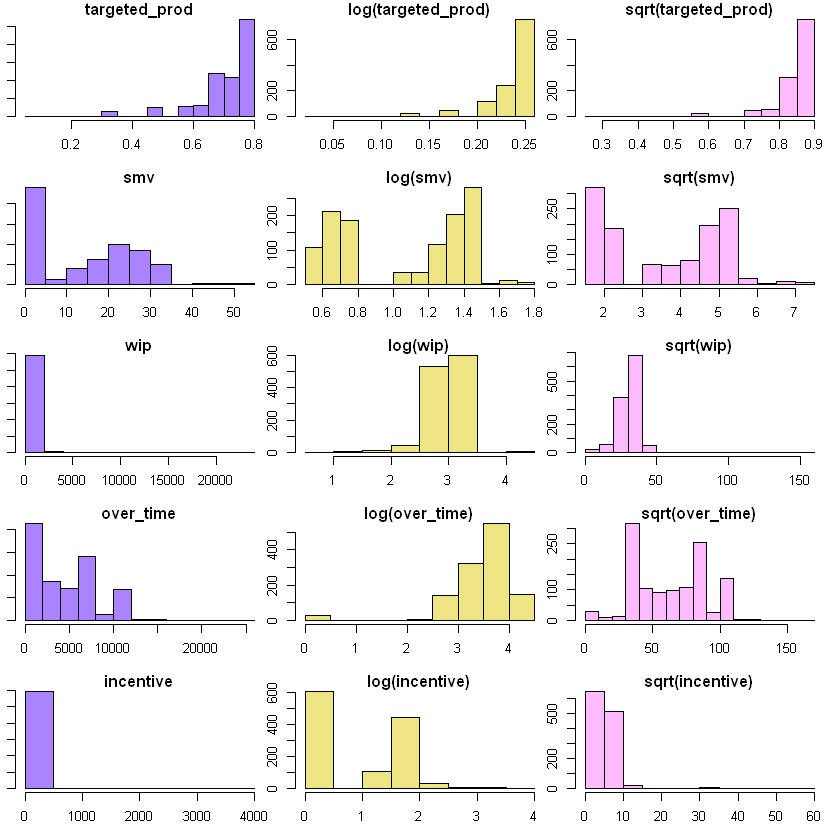

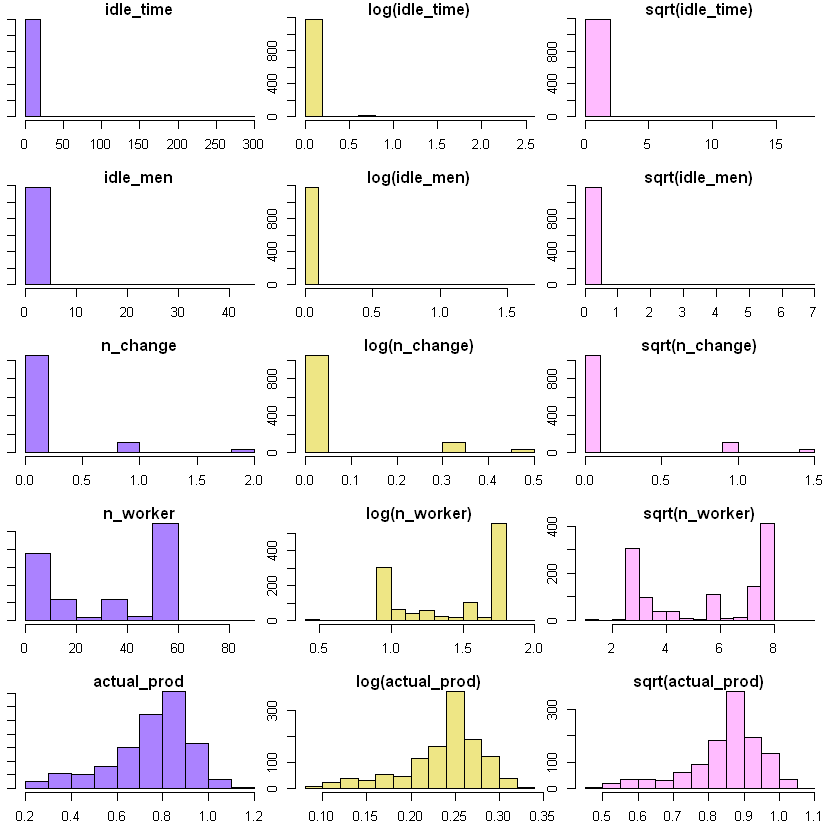

In [15]:
options(repr.plot.width=NULL, repr.plot.height=NULL)
par(mfrow = c(5,3), mar=c(3,1,1,1))
for (name in names(data[c(-1:-4, -14:-16)])){
    transformation(data, name)
}

1. 'targeted_prod': There is not effective change in the distribution after transformation. It is reasonable to have a left skewed targeted productivity as targets are normally set to be higher than its mean.
2. 'smv': Skewness has effectively reduced by the log and square-root transformation. However, the three distributions all exibits certain degree of bimodal characteristics. This may be because there are two different departments is this dataset, and each department has different standard minute value for their tasks.
3. 'wip': Some normalization is achieved by log transformation, however, the distribution becomes left skewed. It is reasonable that work in progress exibits right skewed unimodal characteristics as most of the works are accomplished.
4. 'over_time': Some normalization is achieved by square-root transformation, however, the distribution exhibits some bimodal characteristics. It is reasonable that 'over_time' is right skewed as it means most of the works does not require/require less extra time to finish. The bimodal characteristics may have the same reason as explained for 'smv' (seen above).
5. 'incentive': Some normalization is achieved by log transformation. It yields a distribution that exhibits bimodal characteristics, whereas the original is highly right skewed. This could mean that the industry offers little or very low incentive to most of its workers, and high incentive to very few workers or the management teams. Its mean of 38 and maixmum of 3600 can be the evidence (seen above statistics summary).
6. 'idle_time' and 'idle_men': There is no obvious effect from the transformations, and their natures of right skewness do not change. A right skewed 'idle_time' or 'idle_men' is reasonable as it means there is few interruption that causes little idle time/few idle men for most of the productions.
7. 'n_change': There is no obvious effect from the transformations. The highly right skewness of 'n_change' means there is a lower number of changes in style for most of the products, which is reasonable.
8. 'n_worker': There is no obvious effect from the transformations. The bimodal characteristics can be explained by the reason explained for 'smv' (seen above).
9. 'actual_prod': There is no obvious effect from the transformations. The left skewed characteristics can be explained by the reason explained for 'targeted_prod' (seen above).

### 2.6 Bivariate Analysis

In [16]:
#function adopted from: http://stackoverflow.com/questions/31709982/how-to-plot-in-r-a-correlogram-on-top-of-a-correlation-matrix

#set colour
colorRange <- c('#69091e', '#e37f65', 'white', '#aed2e6', '#042f60')
myColorRampFunc <- colorRamp(colorRange)

#compute correlation
panel.cor <- function(w, z, ...) {
    correlation <- cor(w, z)
    ## because the func needs [0,1] and cor gives [-1,1], we need to shift and scale it
    col <- rgb(myColorRampFunc((1 + correlation) / 2 ) / 255 )

    radius <- sqrt(abs(correlation))
    radians <- seq(0, 2*pi, len = 50) # 50 is arbitrary
    x <- radius * cos(radians)
    y <- radius * sin(radians)
    #make them full loops
    x <- c(x, tail(x,n=1))
    y <- c(y, tail(y,n=1))

    #trick: "don't create a new plot" thing by following the
    #advice here: http://www.r-bloggers.com/multiple-y-axis-in-a-r-plot/
    par(new=TRUE)
    plot(0, type='n', xlim=c(-1,1), ylim=c(-1,1), axes=FALSE, asp=1)
    polygon(x, y, border=col, col=col)
}

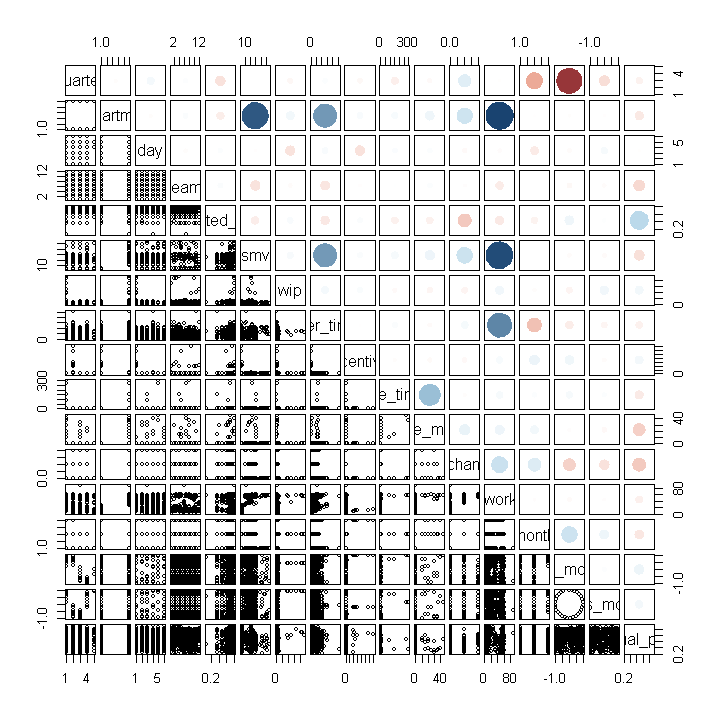

In [17]:
#scatter plots and correlation of all attributes
options(repr.plot.width=6, repr.plot.height=6)
pairs(data, gap=.3, cex=.6, cex.labels=1.2, upper.panel=panel.cor)

1. 'quarter' and 'sin_mday' has strong negative correlation. However, this just means that higher quarter of the month (e.g. quarter 4) contains later day of the month (e.g. 15 to 20), as $\sin(\frac{2\pi x}{n})$ decreases as x increases. 
2. 'department' has strong positive correlation with 'smv' and 'n_worker' respectively. As discussed from the previous session, different department has different standard minute values and number of workers.
3. 'department' and 'over_time' has moderate positive correlation and the reason maybe the same as discussed for 'smv' and 'n_worker'.
4. 'smv', 'n_worker' and 'over_time' have positive correlation with each other based on the same reason as above.
5. 'targeted_prod' has positive correlation with 'actual_prod'. It is reasonable as higher targets usually give higer results
6. 'idle_men' and 'n_change' has weak negative correlation with 'actual_prod'.

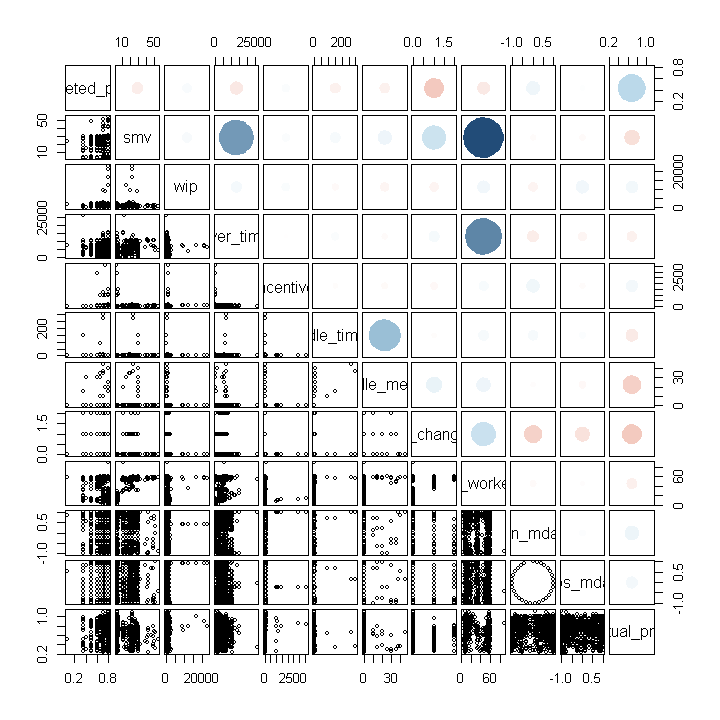

In [18]:
#scatter plots and correlation of all attributes excluding factor attributes
options(repr.plot.width=6, repr.plot.height=6)
pairs(data[c(-1:-4, -14)], gap=.3, cex=.6, cex.labels=1.2, upper.panel=panel.cor)

It is observed that, besides the correlations mentioned above, other attributes either have weak negative or weak positive correlation with 'actual_prod'. Moreover, there is no obvious evidence of linearity shown by the scatter plots. As correlation measures the linearity, and as linear regression assumes the response variable has a linear relationship to the predictor variable, applying linear regression on these attributes may not accurately predict 'actual_prod'. The regression analysis will be performed to investigate this issue.

In [19]:
#create a master dataframe that includes transformation
transformed_data <- data %>% mutate(sqrt_smv=sqrt(smv),
                                   log_wip=log(wip+1), 
                                   sqrt_over_time=sqrt(over_time),
                                   log_incentive=log(incentive+1))

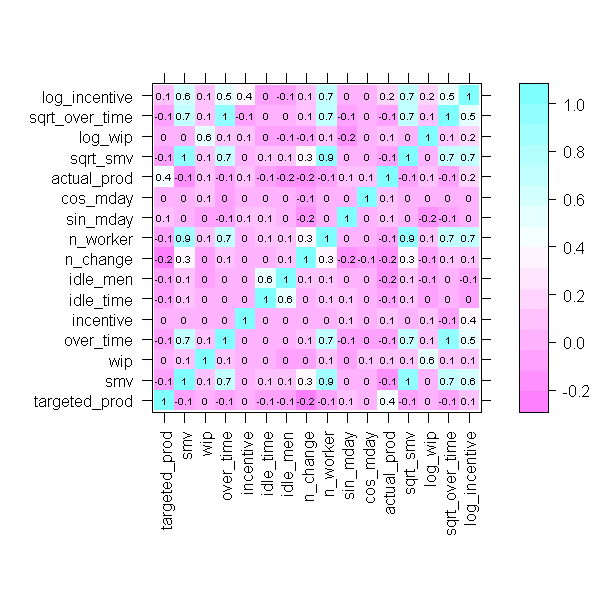

In [20]:
#levelplot of the master dataframe
options(repr.plot.width=5, repr.plot.height=5)
myPanel <- function(x, y, z, ...) {
    panel.levelplot(x,y,z,...)
    panel.text(x, y, round(z, 1), cex=.5)
}
levelplot(cor(transformed_data[c(-1:-4, -14)]), xlab = NULL, ylab = NULL, 
          scales = list(x = list(rot = 90)), panel = myPanel)

The correlation heatmap shows that there is no obvious linearity between the response variable 'actual_prod' and other attributes even after transformation. The strongest correlation with 'actual_prod' is still 'target_prod'. There is no obvious difference between the coefficients of transformed varaibles and their original forms. This may imply that transformation of the variables for the given dataset does not increase their linearity to the response variable. Regression analysis will be performed to test if transformation can improve the regression model.

In [21]:
plot_boxes <- function(dataframe, variable){
    options(repr.plot.width=12, repr.plot.height=12)
    variable <- ensym(variable)
    ggplot(dataframe, aes(x = !!variable, y = value)) +
    facet_wrap(~variable, scales="free") +
    geom_boxplot(mapping=aes(fill=!!variable), alpha=.6) + theme_light() +
    theme(axis.text.x = element_text(angle = 45, vjust=0.5, size=10))  +
    scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})
    }

Using quarter, department, day, team, month as id variables


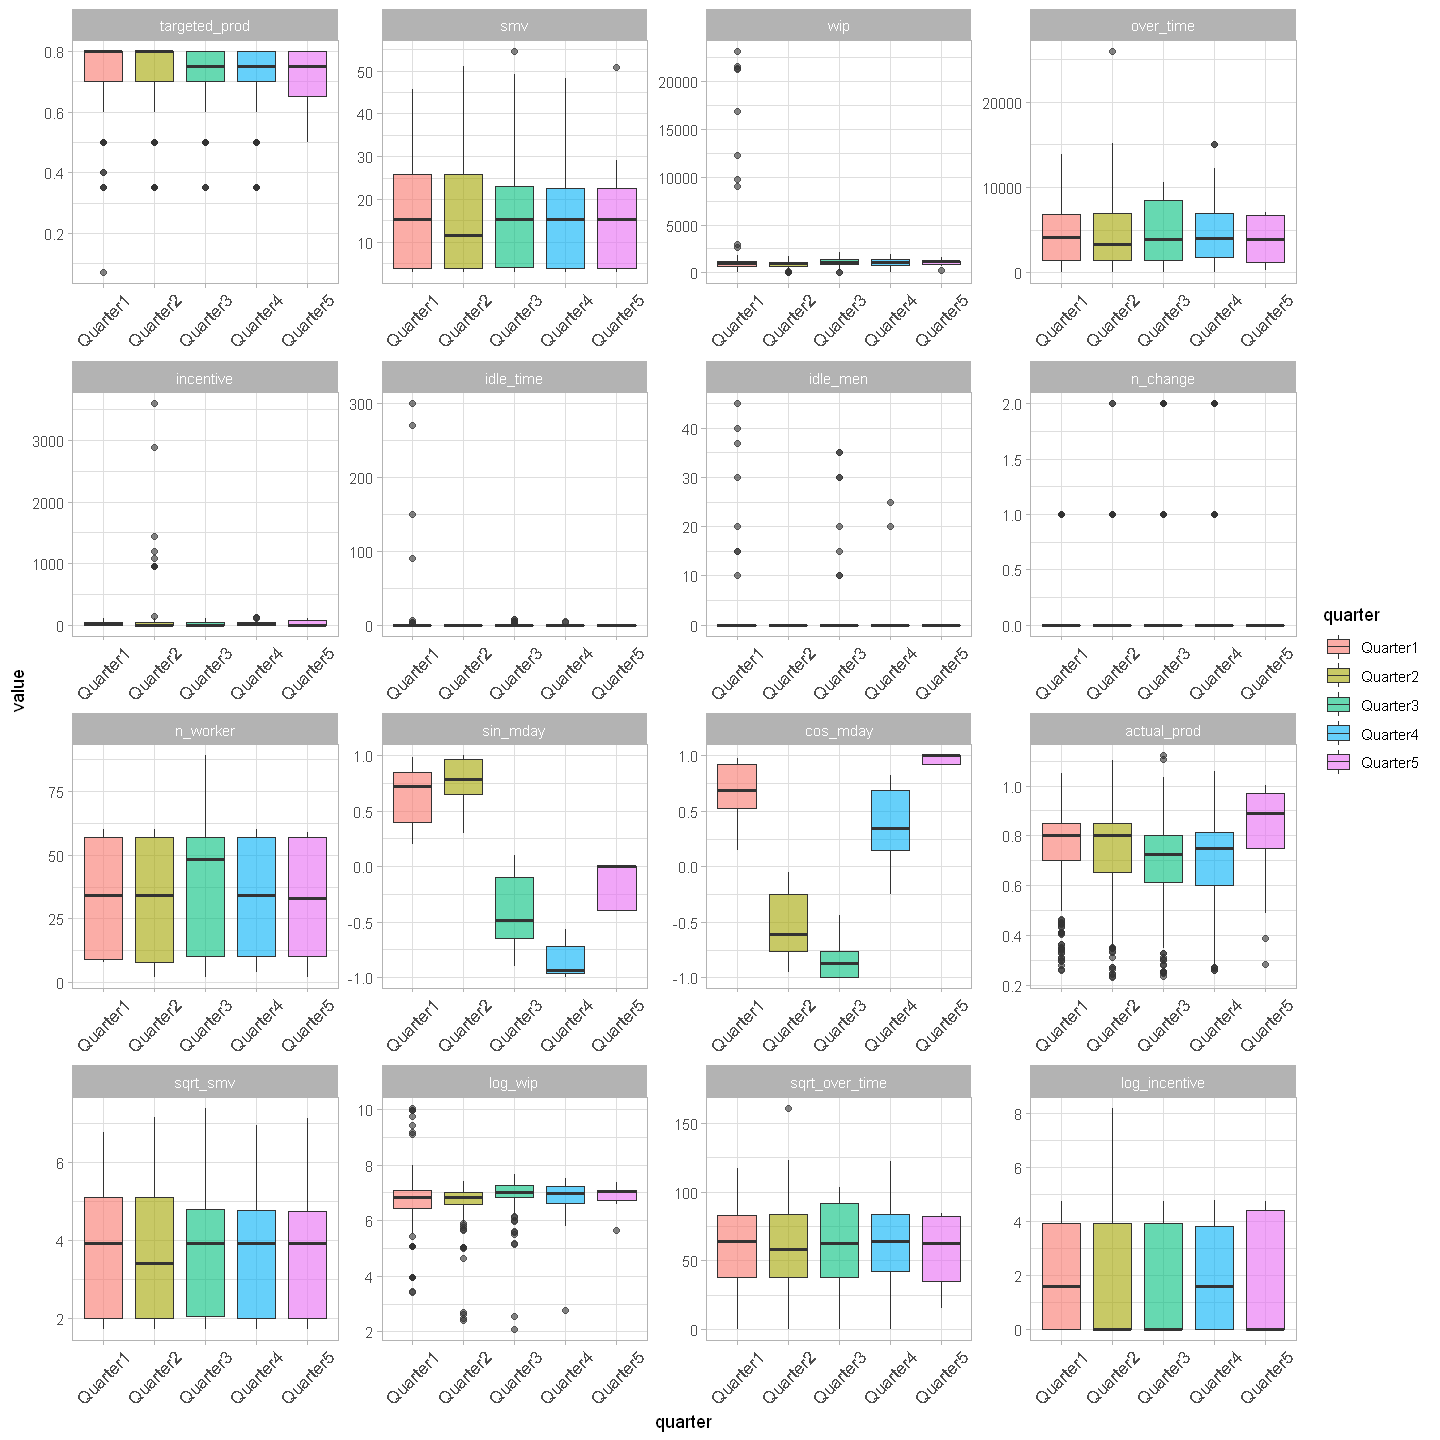

In [22]:
melt_data <- melt(as.data.frame(transformed_data))
plot_boxes(melt_data, 'quarter')

1. For 'targeted_prod', 'smv', and 'over_time': their inter-quartile ranges remain constant at certain degree with some extreme values across the quarters, especially for 'targeted_prod'. This may imply that the amount of works offered across different quarters are constant except for some special cases.
2. For 'n_worker': the numbers remain constant for quarter 1, 2, 4, and 5 where its inter-quartile ranges and medians are relatively the same. However, the number goes up in quarter 3. This may imply that the industry has hired new people during that time.
3. For 'idle_time', 'idle_men', and 'wip': they have significant amount of extreme values in quarter 1. One possible scenario is that there were some serious interruptions in quarter 1 lasting for a long time, many workers were unable to work, and finally led to higher number of works in progress.
4. For 'actual_prod': comparing to 'targeted_prod', their medians remain at similar level of 0.8 across the 5 quarters. They also have values below their minimum. This may imply that most of the works meets their expectation. However, in quarter 1, 'targeted_prod' has value much lower than 'actual_prod'; and there is a very high value in 'actual_prod' in quarter 3. One question arises as if these two points are valid.
5. For transformed attributes: some extreme values disappear from 'smv', 'incentive', and 'over_time', skewness is highly reduced from 'wip'.

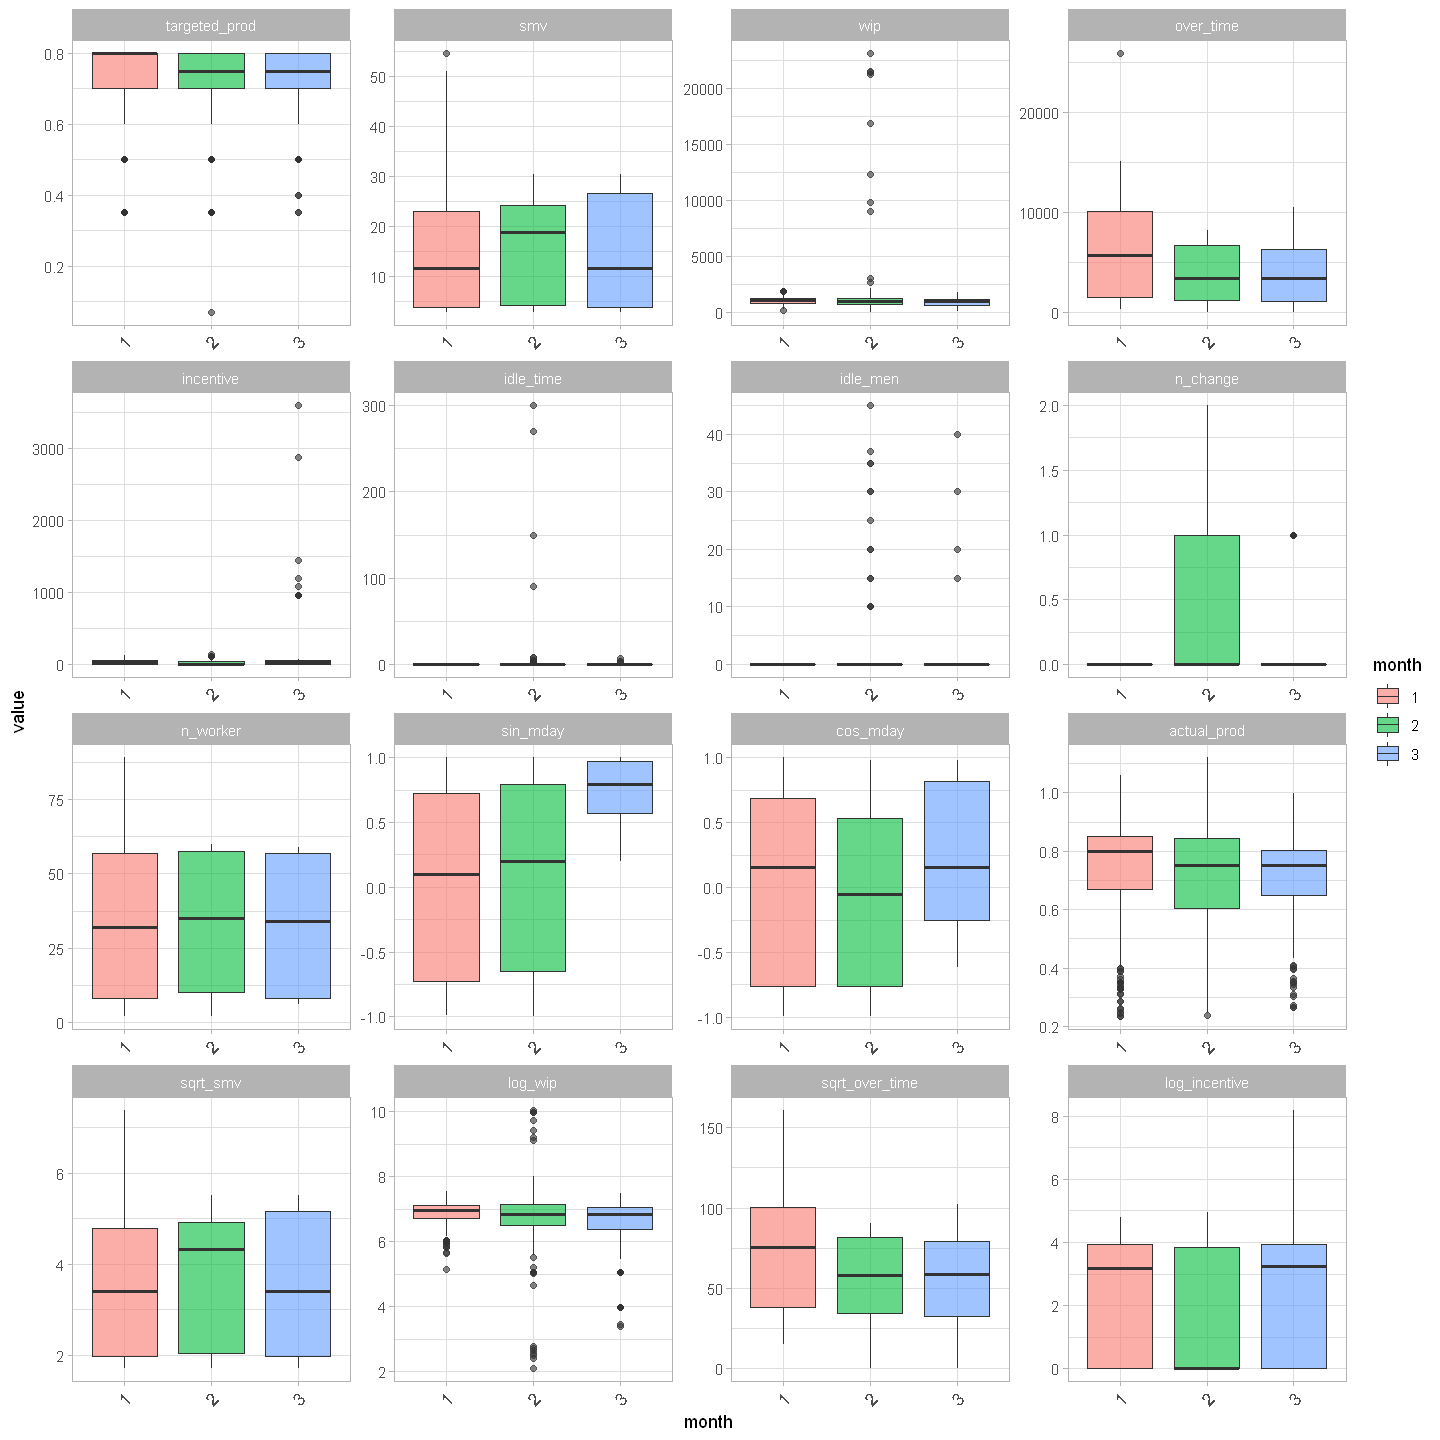

In [23]:
plot_boxes(melt_data, 'month')

1. The small value below 0.2 mentioned is in quarter 2 Feburary.
2. The scenario mentioned for high 'idle_time', 'idle_men', and 'wip' also occurred in Feburary.
3. Number of style change spread the mostin Feburary.
4. A lot of high incentive was offered quarter 2 in March.
5. One task has very high over time (above 25000) in quarter 2 January.
6. For transformation: same effect as stated above.

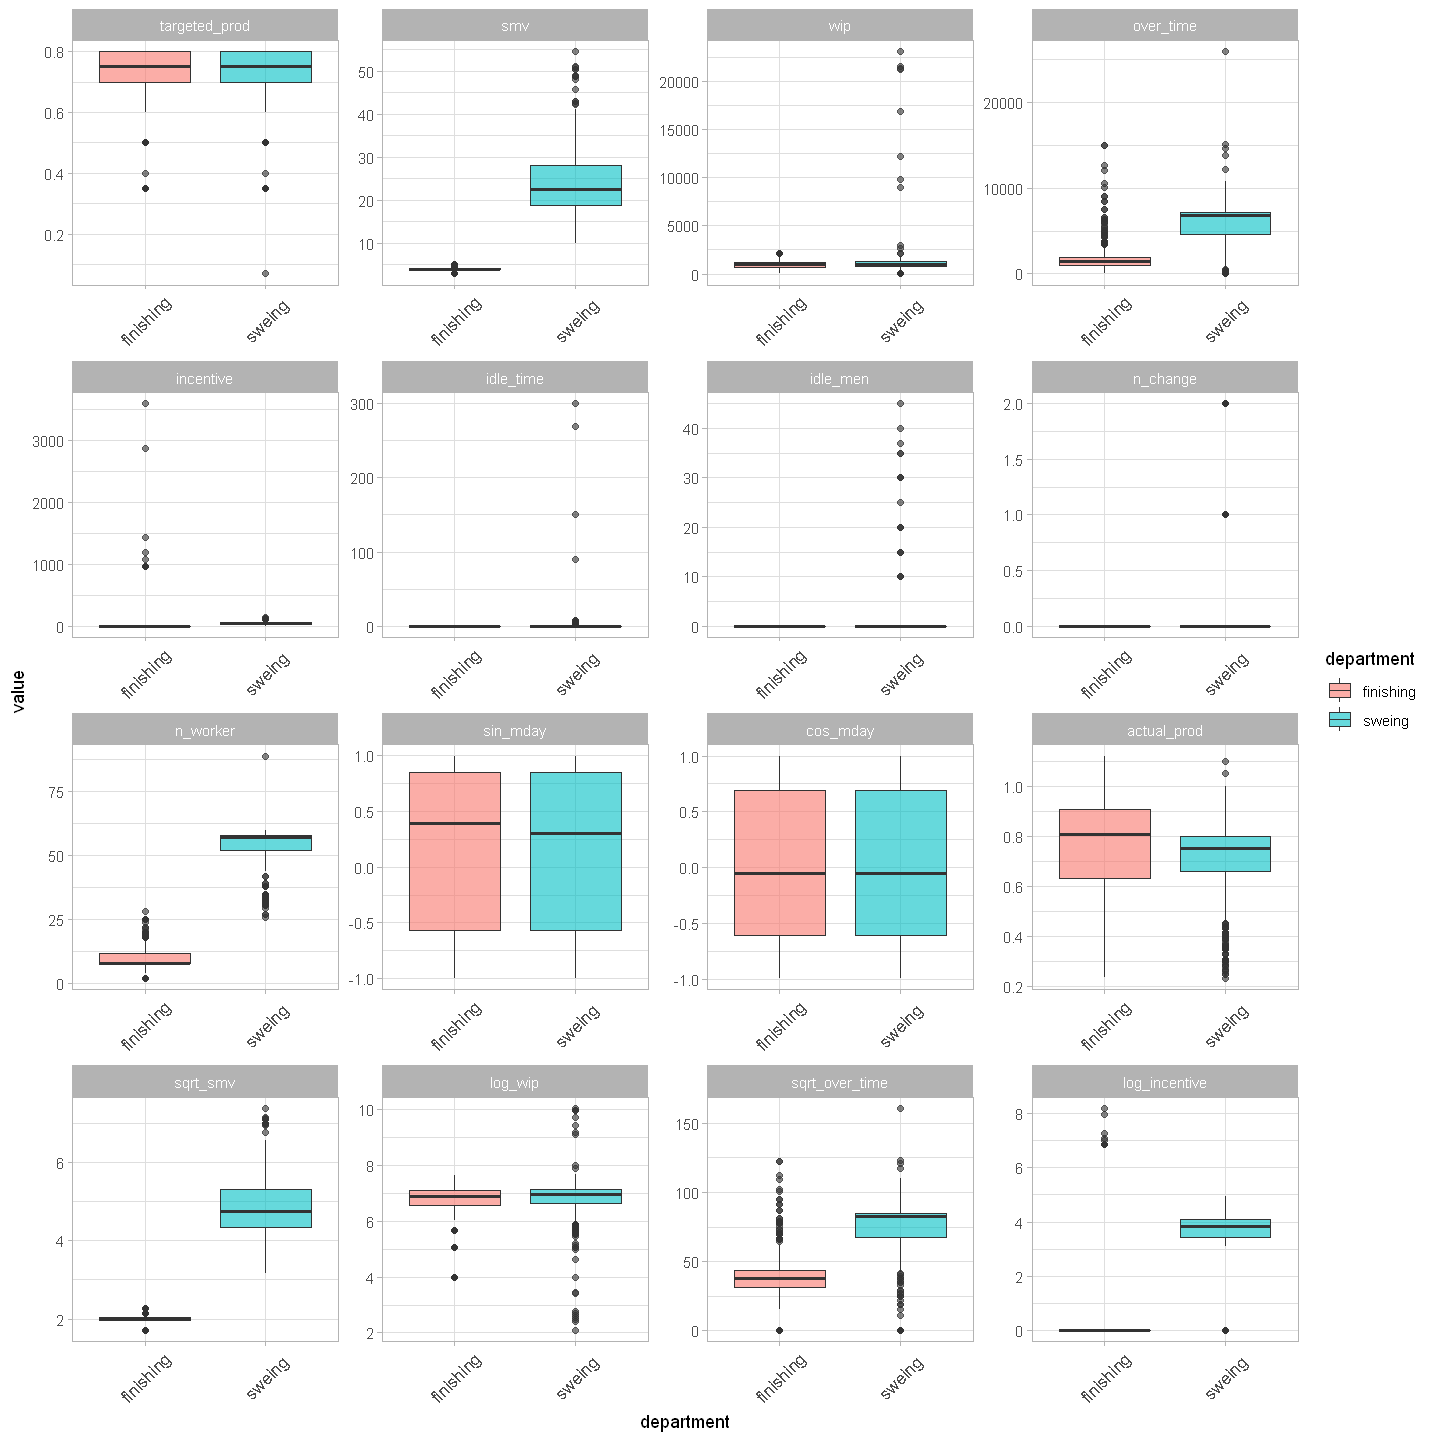

In [24]:
plot_boxes(melt_data, 'department')

1. While the two departments have similar distributions of tageted productivity, sweing has more special cases in its actual productivity and has targeted productivity below 0.2.
2. Sweing requires much more time and number of workers for its tasks than finihsing.
3. While the two departments have certain amount of overtime, sweing has the highest number of overtime hours, and it owns the high 'wip', 'idle_men', 'idle_time' scenario.
4. For transformation: no obvious effects observed beside reducing scales.

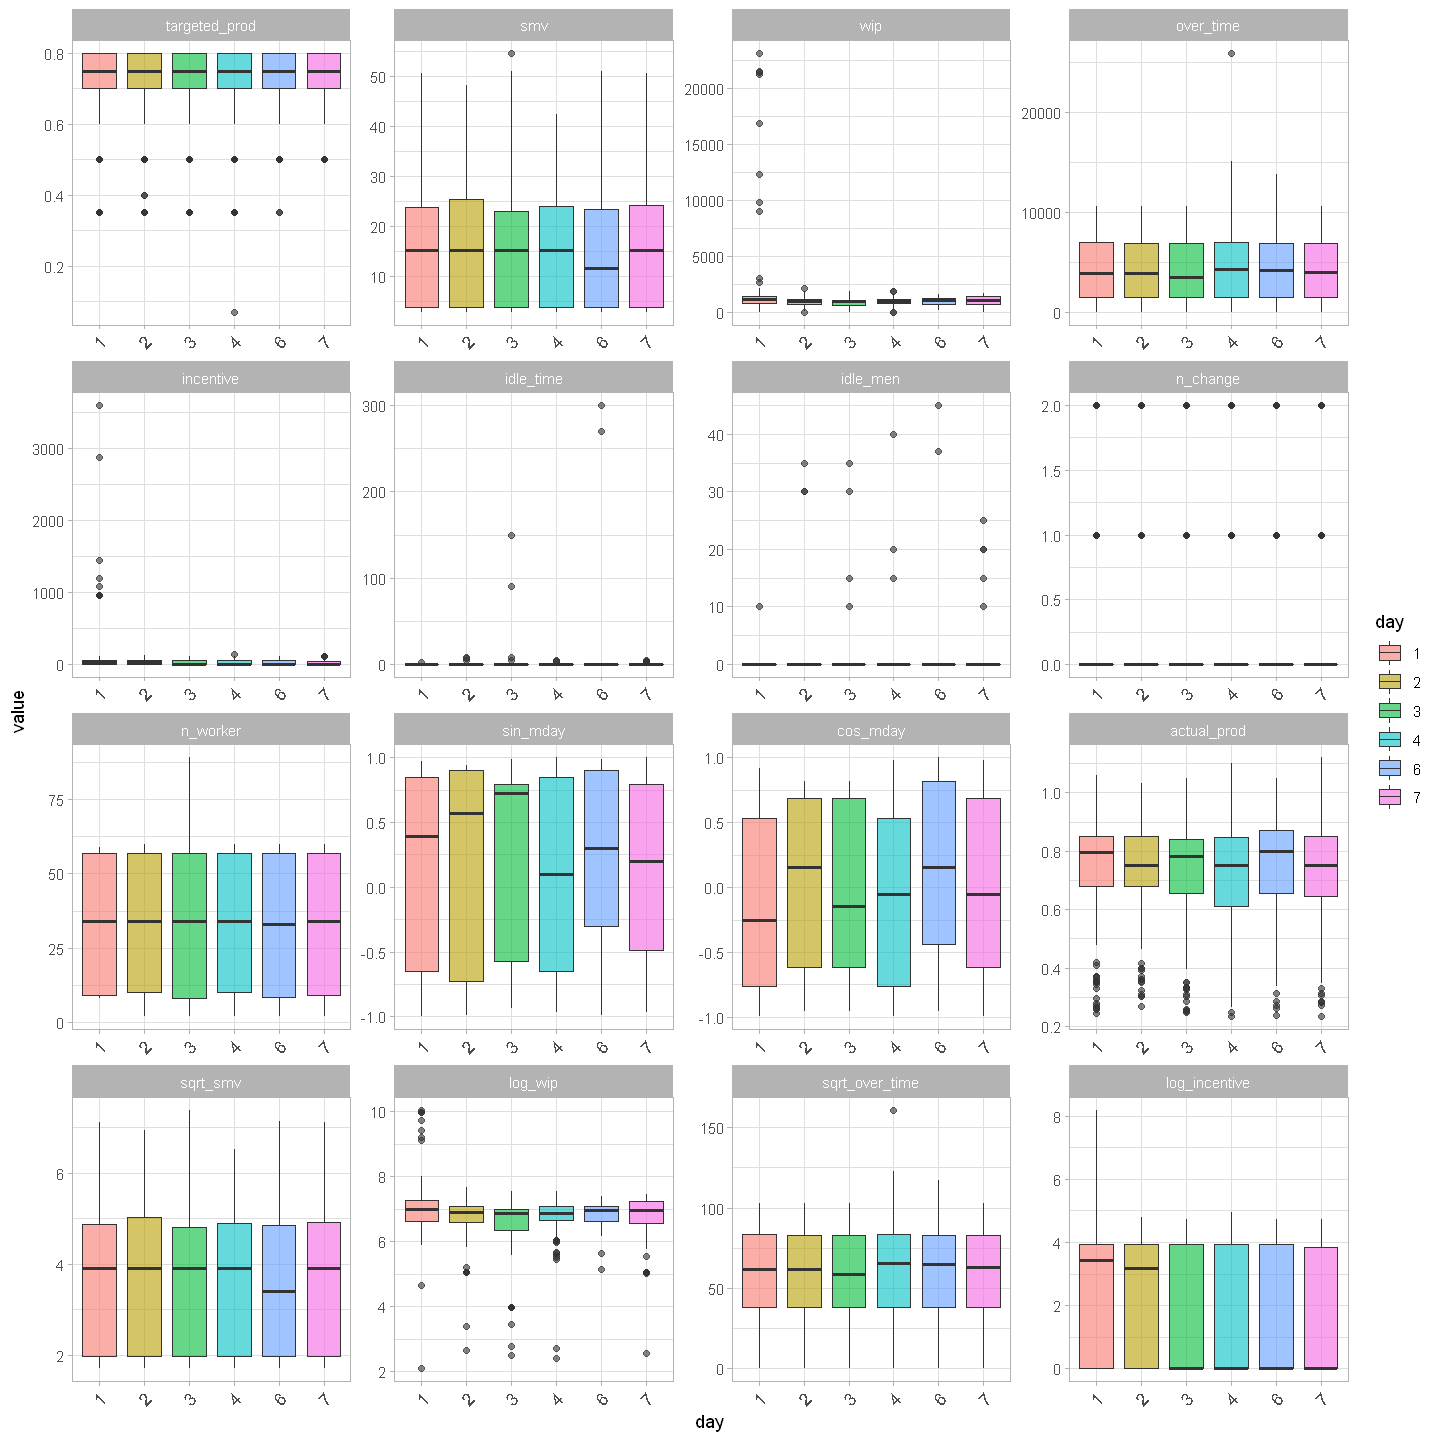

In [25]:
plot_boxes(melt_data, 'day')

1. Thursday owns the lowest targeted productivity and highest overtime.
2. Most of the very high incentive was given on Monday
3. The distributions of 'targeted_prod' and 'actual_prod' remain stable except for some special cases.
4. Monday has a lot of very high 'wip'.
5. Number of workers are relatively stable across the week except for Wednesday which has higher maximum.
6. It is interesting to observe that the number of change in style has same patterns across the week.
7. For transformed attributes: some extreme values disappear from 'smv', 'incentive', and 'over_time', skewness is highly reduced from 'wip'.

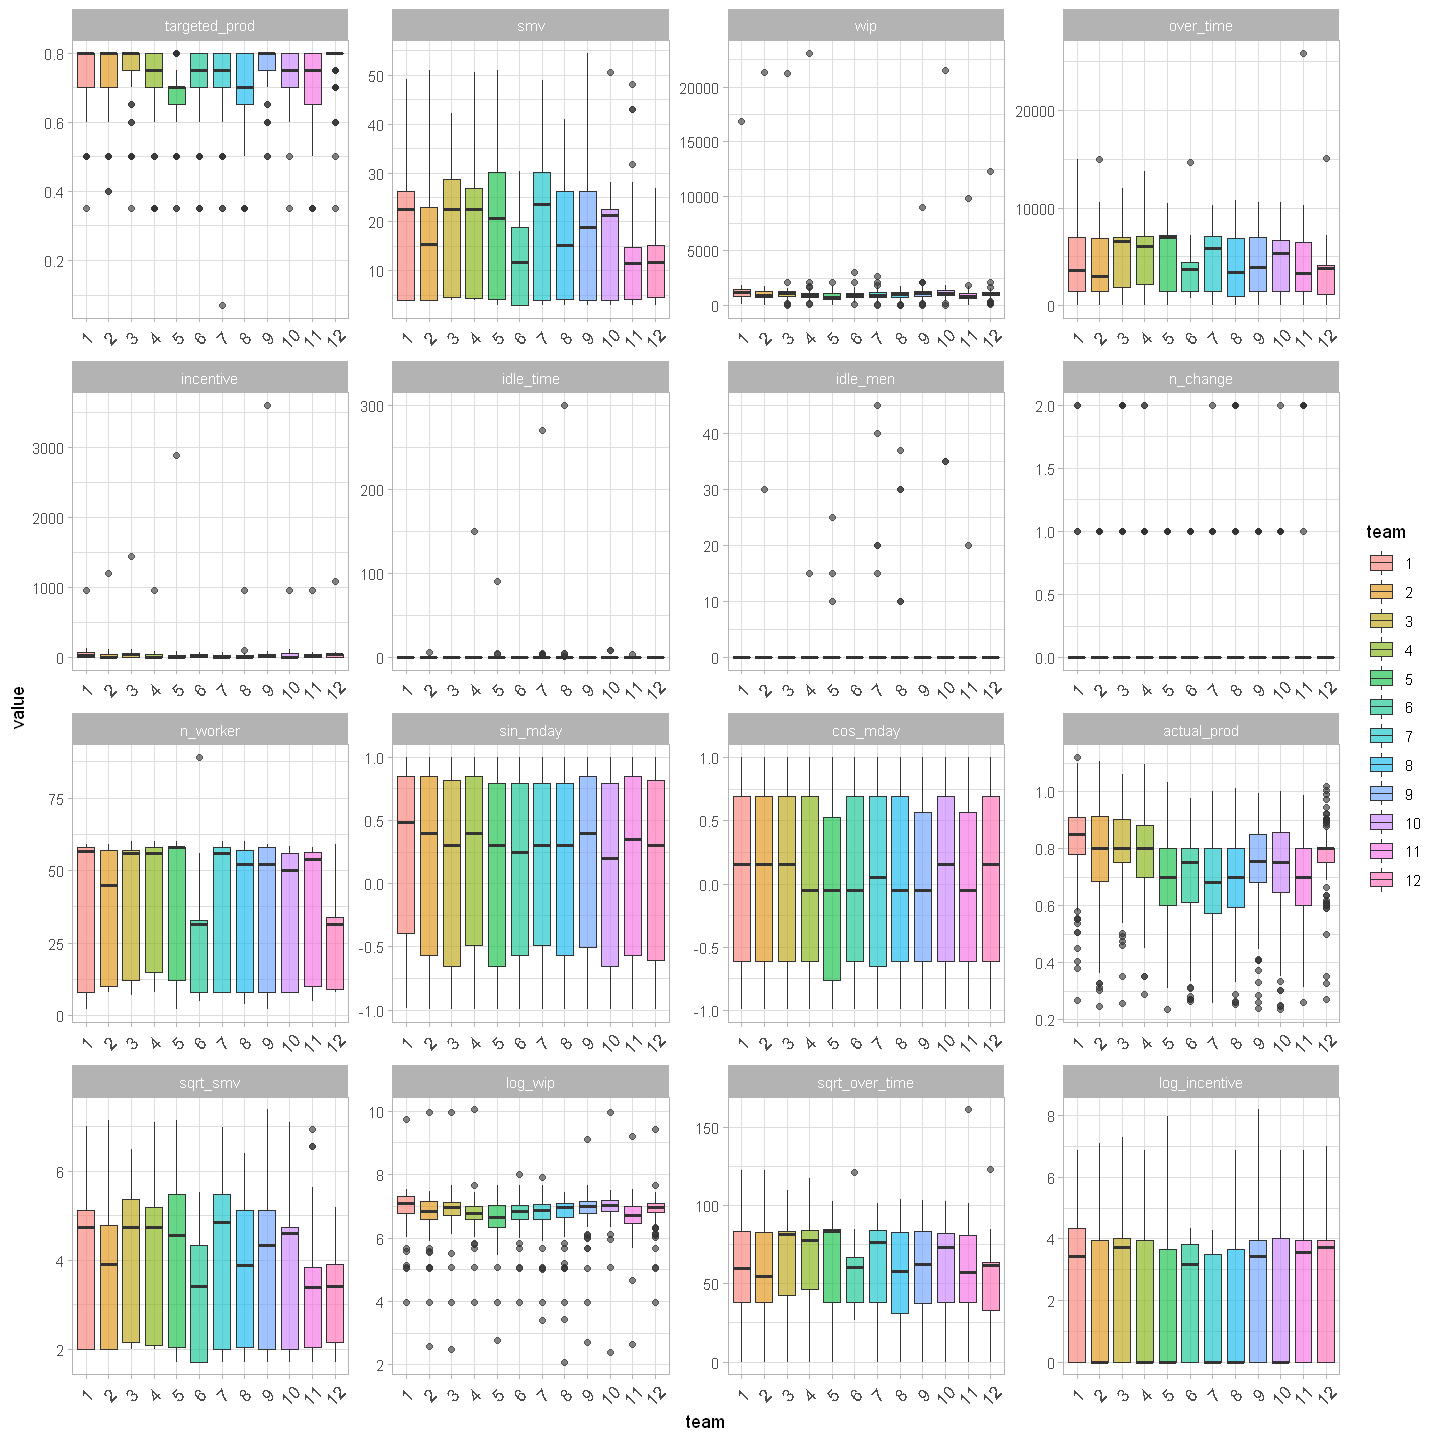

In [26]:
plot_boxes(melt_data, 'team')

1. Comparing to other factors, the statistics such as median of 'targeted_prod' across different teams vary more, and same phenomenon also appears within 'actual_prod'. The targeted productivity of team 12 may imply that they do not receive many tasks, and their actual productivity could mean that they may have outstanding perfromance as many of their productivity are above expectations.
2. 'n_worker' and 'over_time' also varies across different teams with changing in their respective medians. Both team 6 and team 12 has the lowest IQRs in 'n_worker' and 'over_time'. This may imply the tasks offered to both teams do not require many people or time.
3. Team 9 has the highest incentive followed by team 5; while team 6 and 7 have the lowest or perhaps none.
4. For transformed attributes: same as above.

### 2.8 Multivariate Analysis

In [27]:
#function to obtain lengend from ggplot
get_legend<-function(myggplot){
  tmp <- ggplot_gtable(ggplot_build(myggplot))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)
}

In [28]:
#re-define above function
get_legend2 <- function(factor){
    factor <- ensym(factor)
    p <- ggplot(data, aes(x = smv, y = actual_prod, colour=!!factor)) + geom_point() +
         geom_smooth(method = "lm", se = FALSE) + theme_light()
    legend <- get_legend(p)
    return(legend)
    }

In [29]:
#define function to plot the interactions between attributes and factor attributes
plot_interact <- function(factor){
    options(repr.plot.width=9, repr.plot.height=9)
    factor <- ensym(factor)
    p1 <- ggplot(transformed_data, aes(x = targeted_prod, y = actual_prod, colour=!!factor)) + geom_point() + 
         geom_smooth(method = "lm", se = FALSE) + theme_light() + theme(legend.position="none")
    p2 <- ggplot(transformed_data, aes(x = smv, y = actual_prod, colour=!!factor)) + geom_point() +
         geom_smooth(method = "lm", se = FALSE) + theme_light() + theme(legend.position="none")
    p3 <- ggplot(transformed_data, aes(x = wip, y = actual_prod, colour=!!factor)) + geom_point() +
         geom_smooth(method = "lm", se = FALSE) + theme_light() + theme(legend.position="none")
    p4 <- ggplot(transformed_data, aes(x = over_time, y = actual_prod, colour=!!factor)) + geom_point() +
         geom_smooth(method = "lm", se = FALSE) + theme_light() + theme(legend.position="none")
    p5 <- ggplot(transformed_data, aes(x = incentive, y = actual_prod, colour=!!factor)) + geom_point() +
         geom_smooth(method = "lm", se = FALSE) + theme_light() + theme(legend.position="none")
    p6 <- ggplot(transformed_data, aes(x = idle_time, y = actual_prod, colour=!!factor)) + geom_point() +
         geom_smooth(method = "lm", se = FALSE) + theme_light() + theme(legend.position="none")
    p7 <- ggplot(transformed_data, aes(x = idle_men, y = actual_prod, colour=!!factor)) + geom_point() +
         geom_smooth(method = "lm", se = FALSE) + theme_light() + theme(legend.position="none")
    p8 <- ggplot(transformed_data, aes(x = n_change, y = actual_prod, colour=!!factor)) + geom_point() +
         geom_smooth(method = "lm", se = FALSE) + theme_light() + theme(legend.position="none")
    p9 <- ggplot(transformed_data, aes(x = n_worker, y = actual_prod, colour=!!factor)) + geom_point() +
         geom_smooth(method = "lm", se = FALSE) + theme_light() + theme(legend.position="none")
    p10 <- ggplot(transformed_data, aes(x = sin_mday, y = actual_prod, colour=!!factor)) + geom_point() +
         geom_smooth(method = "lm", se = FALSE) + theme_light() + theme(legend.position="none")
    p11 <- ggplot(transformed_data, aes(x = cos_mday, y = actual_prod, colour=!!factor)) + geom_point() +
         geom_smooth(method = "lm", se = FALSE) + theme_light() + theme(legend.position="none")
    p12 <- ggplot(transformed_data, aes(x = sqrt_smv, y = actual_prod, colour=!!factor)) + geom_point() +
         geom_smooth(method = "lm", se = FALSE) + theme_light() + theme(legend.position="none")
    p13 <- ggplot(transformed_data, aes(x = log_wip, y = actual_prod, colour=!!factor)) + geom_point() +
         geom_smooth(method = "lm", se = FALSE) + theme_light() + theme(legend.position="none")
    p14 <- ggplot(transformed_data, aes(x = sqrt_over_time, y = actual_prod, colour=!!factor)) + geom_point() +
         geom_smooth(method = "lm", se = FALSE) + theme_light() + theme(legend.position="none")
    p15 <- ggplot(transformed_data, aes(x = log_incentive, y = actual_prod, colour=!!factor)) + geom_point() +
         geom_smooth(method = "lm", se = FALSE) + theme_light() + theme(legend.position="none")
    legend <- get_legend2(!!factor)
    grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15, ncol=4, legend)
    }

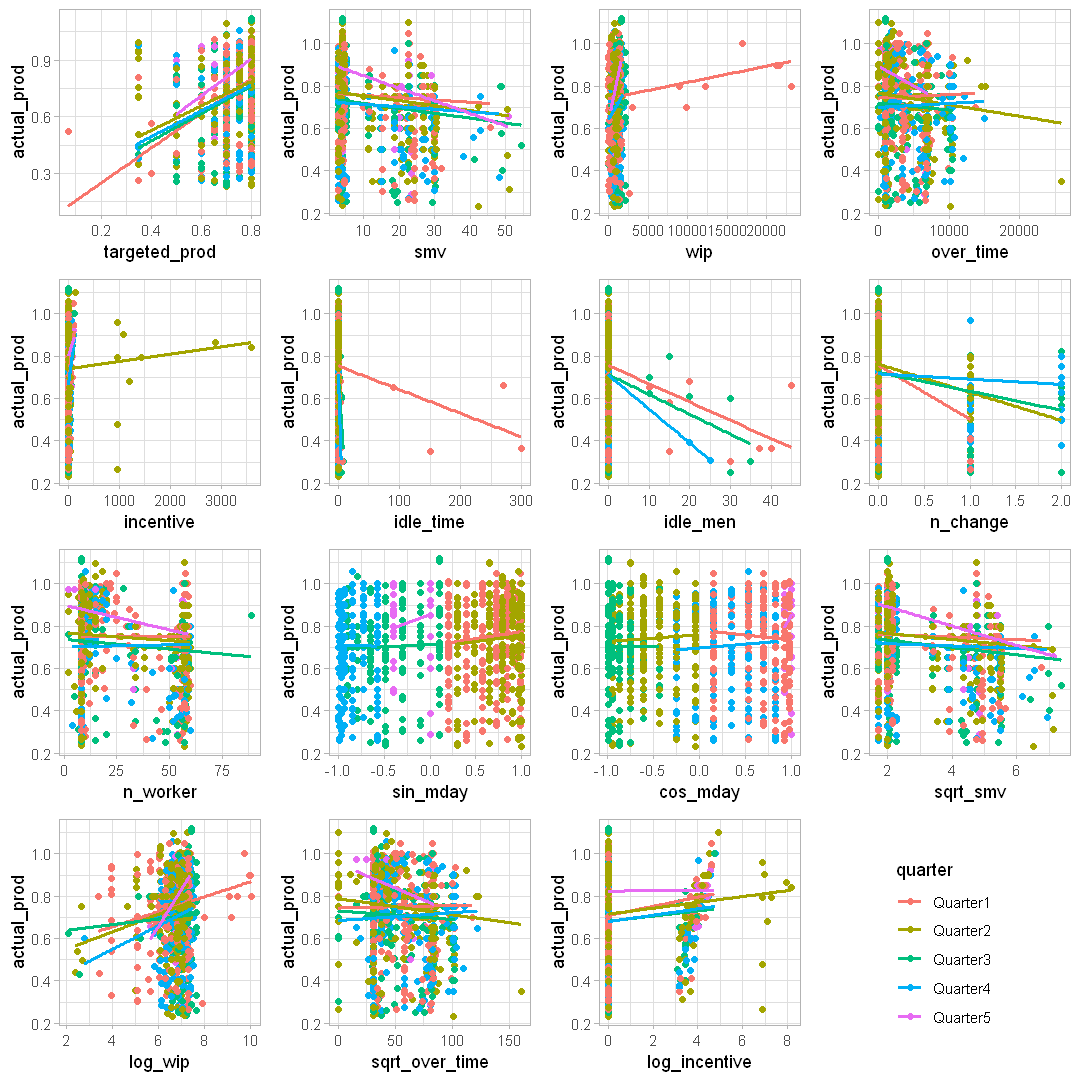

In [30]:
plot_interact(quarter)

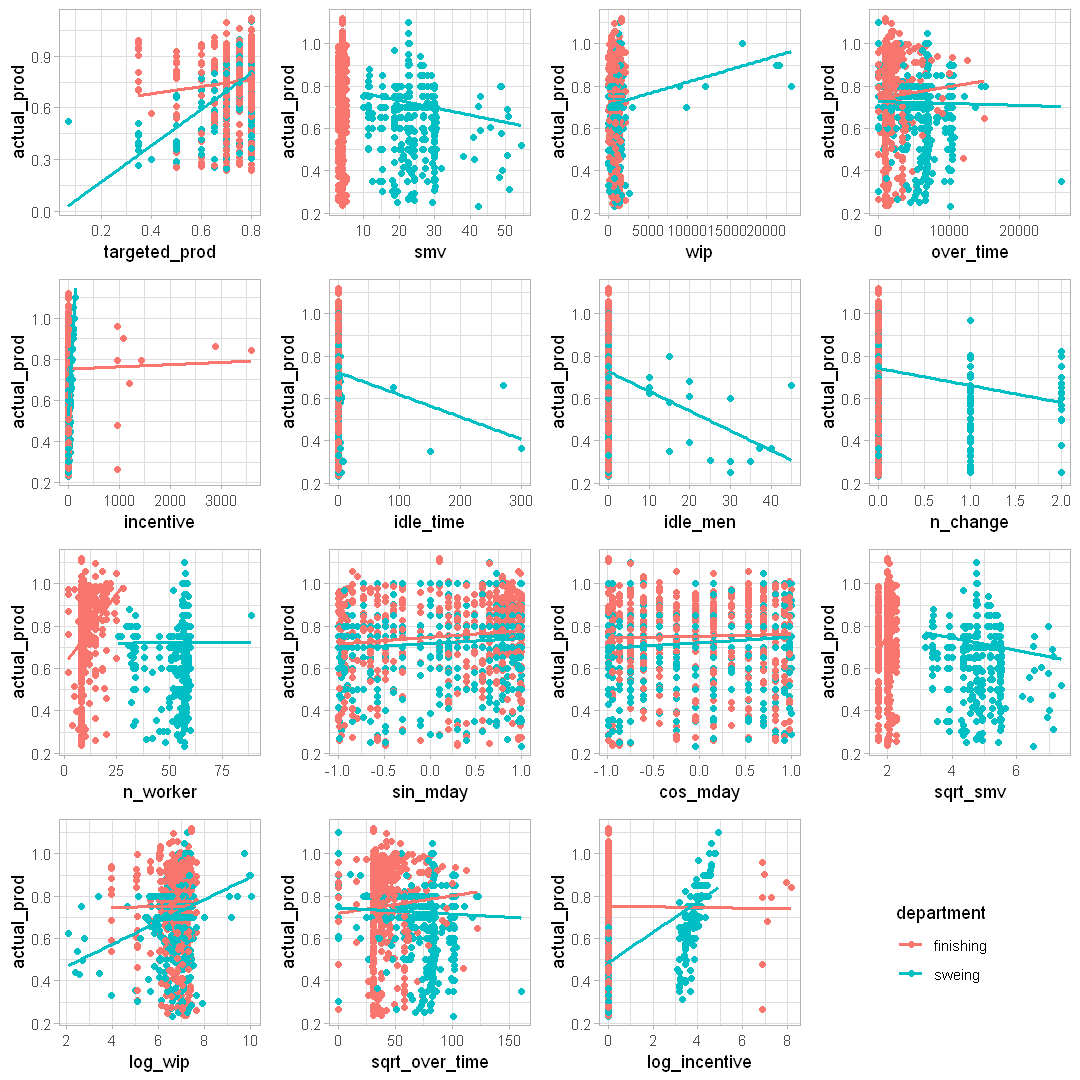

In [31]:
plot_interact(department)

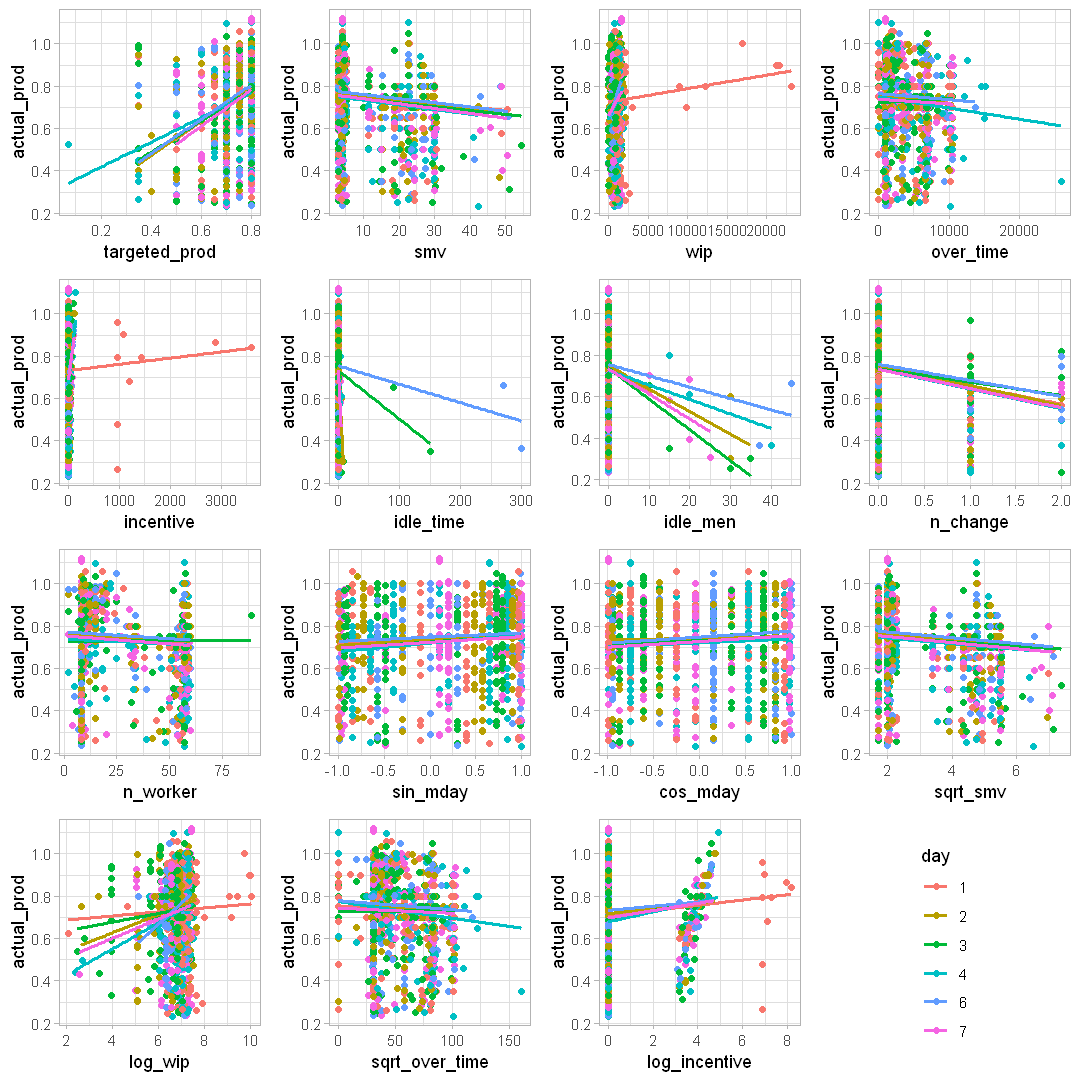

In [32]:
plot_interact(day)

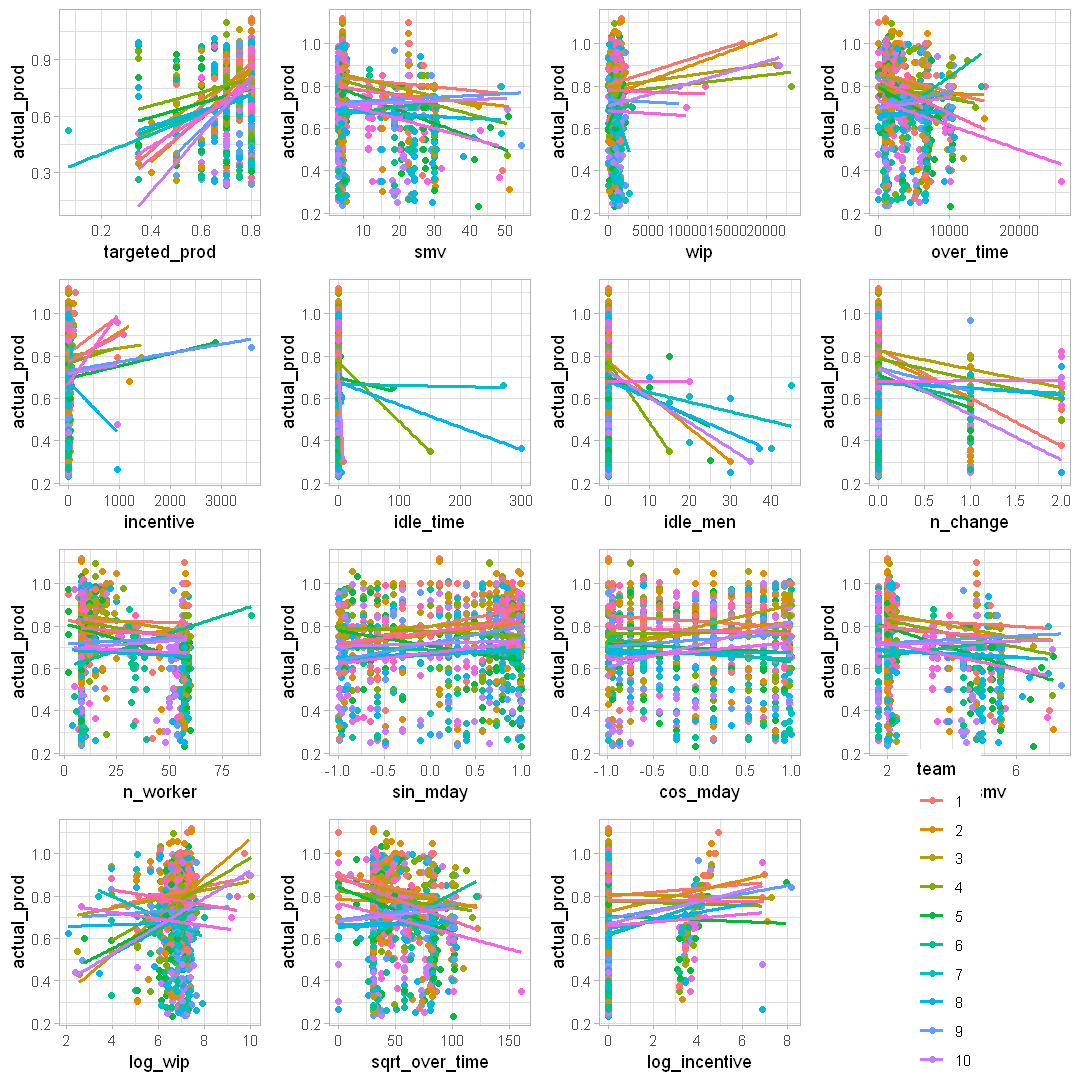

In [33]:
plot_interact(team)

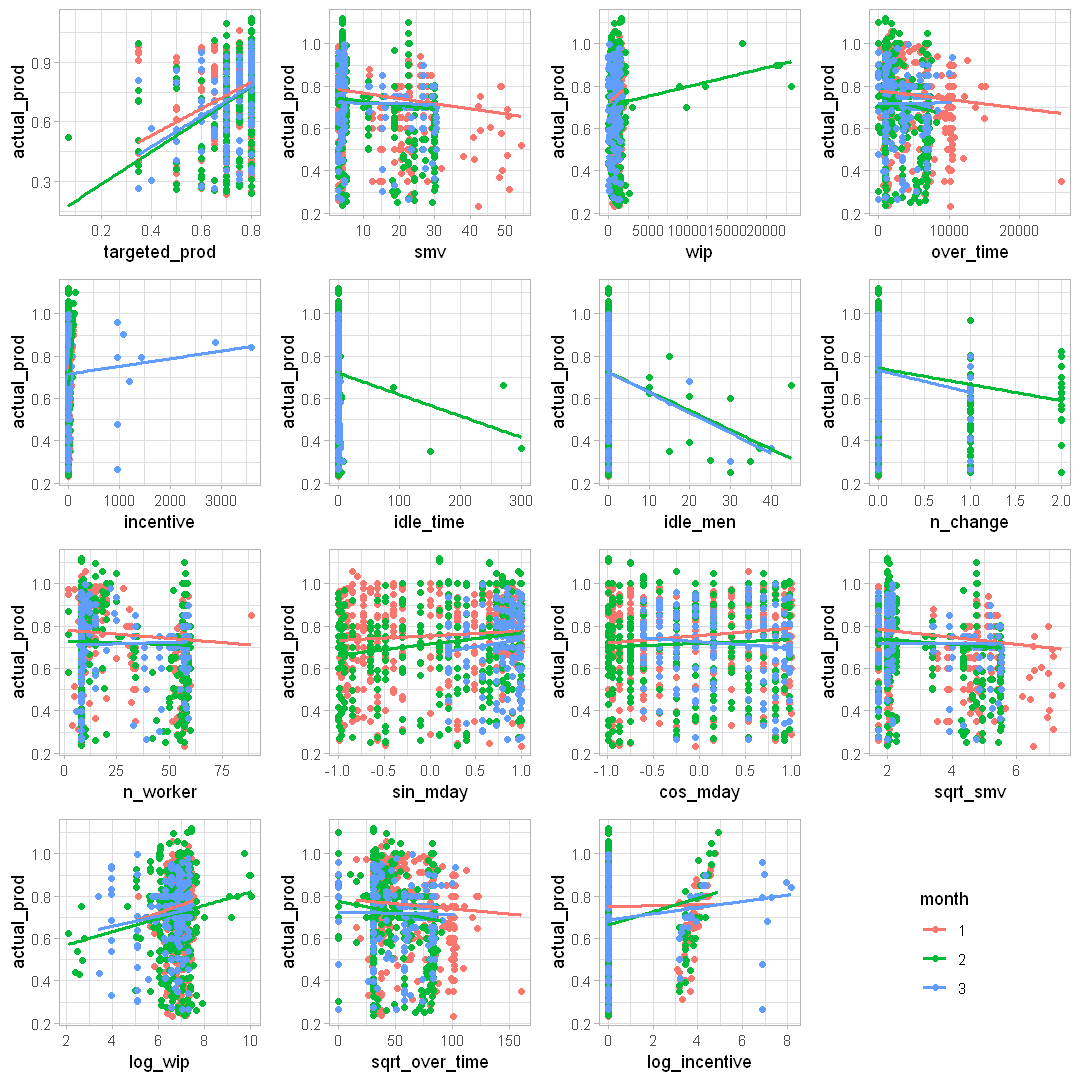

In [34]:
plot_interact(month)

1. All attributes exhibits some level of interaction with quarter, department, day, team, and month respectively.
2. There are some strong interactions such as targeted productivity to team, and overtime to team, where lines intersect each other. While weak interactions have examples of smv to day, and no of worker to day, where lines are nearly parallel to each others.
3. Transformation changes the interaction of the original attribute with other attribute. However, it is unknown at this stage that which pairs has better performance until performing the regression analysis.

### 2.9 EDA Summary

1. There are no obvious linear relationships between the attributes and the response variable 'actual_prod', its most correlation variable is 'targeted_prod'.
2. There exists a number of extreme values in some attributes.
3. There is no obvious improvement in the linearity even after transformation. However, transformation reduces skewness and make extreme values disappeared, it may have positive effect on the regression.
4. There are some strong interactions that may improve the prediction power.
5. As mentioned that there is one possible scenario that an interruption led to high 'wip', 'idle_time', and 'idle_men' in 'sweing' department during quarter 1 in Feubrary.
6. Given that the linearity assumption of linear regression, applying such algorithm may have limited performance on this dataset.

## 3. Methodology<a class="anchor" id="sec_4"></a>

### 3.1 Model Analysis

The following steps will be adopted for the developing of models:
1. Using multiple linear regression to model the 14 attributes.
2. Analyzing the model's summary based on the assumptions of linear regression.
3. Evaluating the model performance based on the 4 diagnostic plots: residual-vs-fitted plot, scale-location plot, normal-qq plot and residual-vs-leverage plot, and parameters such as residual standard error (RSE), R-squared, and adjusted R-squared, .
4. Examining the statistical significance of each predictors, and the closeness of the relationship between them and the reposne variable based on p-values and F-statistics.
4. Testing the transformation and interaction effects.
5. Applying ANOVA to test the nested models, where one model contains all the terms of the other while the other contains less terms.
6. Performing subset selections with diferent criteria such as AIC and BIC.
7. Examing the existence of influential outliers and their impacts on the model.

### 3.2 Result Evaluation

The following steps will be adopted for the evaluating the models:
1. Analyzing the models' validity based on the assumptions of linear regression.
2. Evaluating the prediction performance based on parameters such as root-mean-square error (RMSE), mean absolute error (MAE), R-squared, number of predictors, and the processing time.
3. Performing cross-validation to ensure the model generality.































































































## 4. Model Development <a class="anchor" id="sec_5"></a>

### 4.1 Assumptions of Linear Regression

According to lectures:
1. Linearity: The response variable Y has a linear relationship to the predictor variable X.
2. Nearly normal residuals: The errors must be independent and normally distributed.
3. Constant variability: The Variance of the residuals is constant.

### 4.2 Terminology

1. Residual standard error: $RSE=\sqrt{\frac{1}{n-2}\sum_{n}^{i=1}(y_i-\hat{y_i})^2}$  measures the quality and fitness of the linear regression model. Hence, the lower the RSE the better model.
2. R-squared: $R2=1-\frac{\sum_{n}^{i=1}(y_i-\hat{y_i})^2}{\sum_{n}^{i=1}(y_i-\overline{y_i})^2}$ measures close the linear regression model fits the data. Hence, the higher the R2 the better.
3. Adjusted R-squared: $adjusted \space R2=1-\frac{(1-R2)(N-1)}{N-p-1}$ takes into account the effects of the number of predictors and the sample size. A larger adjusted R2 is also preferred.
4. p-values: a p-value of 0.01 is used to examine if the predictor is statistically significant. Rejecting the null hypothesis if the p-value is larger than 0.01.
5. F-statistic: it indicates if there is a relationship between the predictors and the response variable. It means no relationship if it is close to 1.
6. residuals-vs-fitted plot: it indicates linearity of the model if the points scatter evenly around the line.
7. normal-qq plot: it indicates if there exists a nearly straight line, the residual is nearly normally distributed.
8. scale-location plot: it indicates the constant variance if there exists a non-horizontal line and the data scatter evenly along the line.
9. residuals-vs-leverage plot: it displays the Cook's distance which is used for evaluating outliers, and it indicates there exists outliers if values are outlying at the upper right corner or at the lower right corner.
10. ANOVA:  analysis of variance is used to compare the statistical significance between nested models. The p-value of 0.01 is used as the indicator.
11. AIC: Akaike information criterion is used to penalize the addtion of predictors for subset selection.
12. BIC: Bayesian information criterion is another criterion used to penalize the addtion of predictors for subset selection.
13. Confidence interval: 95% CI is used on the coefficients showing that these ranges of coefficients will be obtained 95% of th time.
14. Bonferroni p-value: the p-value that is used to evaluate outliers. A value of 0.05 is used.
15. Influence plot: ot indicates if the outliers are influential points.

### 4.3 Train-test Preparation

In [35]:
#randomly split the data into train set and test set
set.seed(123)
split <- sample(1:nrow(data), 0.7*nrow(data)) #split into 30% for test
train <- data[split,]
test  <- data[-split,]

In [36]:
#define a function to plot the four diagnositc plots
plot_diagnosis <- function(model){    
    options(repr.plot.width=4.5, repr.plot.height=4.5)
    par(mfcol=c(2,2), mar=c(2,1,2,1))
    plot(model)
}

### 4.4 Model 1

The first model will be using all the 14 attributes with no other effects.


Call:
lm(formula = actual_prod ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56474 -0.06082  0.01260  0.08604  0.48009 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.664e-01  5.481e-02   4.860 1.41e-06 ***
quarterQuarter2   8.497e-03  2.486e-02   0.342 0.732573    
quarterQuarter3   3.694e-02  3.767e-02   0.981 0.327101    
quarterQuarter4   6.573e-02  3.638e-02   1.807 0.071192 .  
quarterQuarter5   1.348e-01  3.573e-02   3.772 0.000174 ***
departmentsweing -8.735e-02  4.142e-02  -2.109 0.035238 *  
day2              1.534e-02  1.816e-02   0.845 0.398403    
day3             -8.543e-03  1.837e-02  -0.465 0.641939    
day4             -1.288e-02  1.852e-02  -0.695 0.487132    
day6             -7.926e-03  1.932e-02  -0.410 0.681785    
day7             -3.369e-03  1.791e-02  -0.188 0.850807    
team2            -3.255e-02  2.376e-02  -1.370 0.171046    
team3             3.440e-03  2.505e-02   0.137 0.8

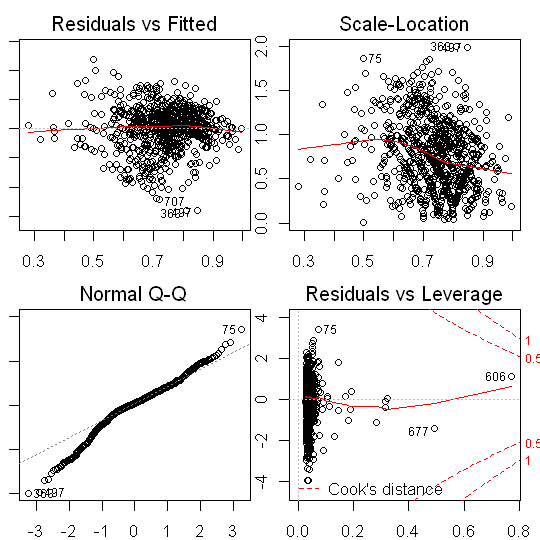

In [37]:
start <- Sys.time()
model1 <- lm(actual_prod~., train) #use all the variables
end <- Sys.time() 
time1 <- end-start #calculate the process time
summary(model1)
plot_diagnosis(model1)

0. Some dummy predictors such as 'quarterQuarter1' and 'departmentfinishing' are excluded automatically as their coefficients cannot be estimated due to colinearity.
1. The adjusted R2 is 0.3149, which means the model does not fit the data well.
2. It is also indicated by the R2 of 0.3428, which means there is only 34.3% of variance explained by the model.
3. The RSE of 0.145 implies that the mean error rate for this model is about 14%, which can be considered high.
4. The F-statistics is 12.3 with 34 predictors indicates that many of the predictors have low level of relationship with the response variable.
5. It is also indicated by the p-value exibited by many of the predictors, who has values higher than 0.01. This could mean that they are statistically insignificant.
6. The residuals-vs-fitted plots shows that there are a lot of data scatters around the line. However, they do not scatter evenly, which could mean that there lacks linearity.
7. The normal qq plot implies that the residual may not have normal distribution as the tails diverge from the dashed line, especially the lower part.
8. The scale-location plot shows that the there exists a non-horizontal red line and the data spread out from the line.  This could mean that the residuals change as fitted values change, and its variance is not constant.
9. The residuals-vs-leverage plot shows that the data points are within the red-dashed line. There is no influential outliers observed.
10. As expected that 'targeted_prod' and 'smv' have high statistical significance on the model given that their p-values are much lower than 0.01.

These findings implies that the early assumptions made in EDA may be true that there is no or little linearity between the response variable and the other attributes, and linear regression has limited power. However, it is going to dig deeper if other measures can improve the model. 

### 4.5 Model 2

The second model will be using the transformed attributes, and the original ones will be replaced. The transformed predictors are:
1. sqrt(smv)
2. log(wip)
3. sqrt(over_time)
4. log(incentive)


Call:
lm(formula = actual_prod ~ . + sqrt(smv) - smv + log(wip + 1) - 
    wip + sqrt(over_time) - over_time + log(incentive + 1) - 
    incentive, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56086 -0.06261  0.01133  0.08296  0.47378 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.3359250  0.0874199   3.843 0.000131 ***
quarterQuarter2    -0.0085722  0.0242053  -0.354 0.723321    
quarterQuarter3     0.0166028  0.0366571   0.453 0.650728    
quarterQuarter4     0.0421865  0.0352470   1.197 0.231706    
quarterQuarter5     0.1291179  0.0346452   3.727 0.000207 ***
departmentsweing   -0.1543932  0.0443455  -3.482 0.000525 ***
day2                0.0184236  0.0173909   1.059 0.289744    
day3               -0.0009669  0.0177717  -0.054 0.956625    
day4               -0.0119235  0.0176779  -0.674 0.500198    
day6               -0.0079818  0.0185237  -0.431 0.666660    
day7                0.0052527  0.017

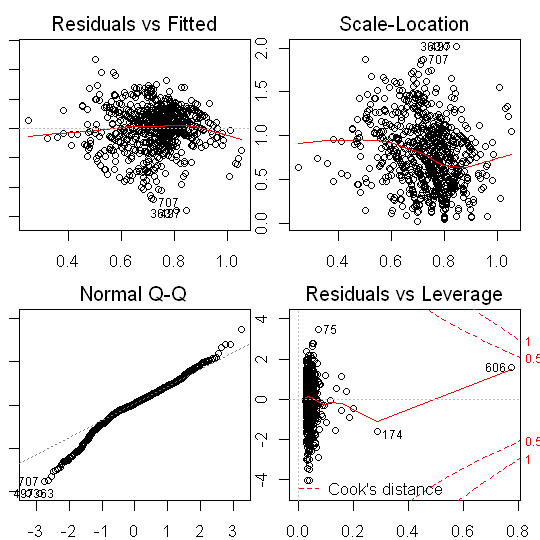

In [38]:
start <- Sys.time()
model2 <- lm(actual_prod~. + 
             sqrt(smv) - smv +
             log(wip+1) - wip +
             sqrt(over_time) - over_time +
             log(incentive+1) - incentive, train)
end <- Sys.time()
time2 <- end-start
summary(model2)
plot_diagnosis(model2)

1. Addtional 3.9% added to adjusted R2.
2. 4% addional variance explained by model2.
2. The RSE decreases to 0.1407, but the difference is very small.
3. The F-statistics increases to 14.5 with 34 predictors.
4. Many predictors still exhibit low statistical significance indicated by their p-values.
5. The 4 plots have no obvious changes compared to model1, indicating little or no improvement in linearity.

It is evident that although there might be no increase in linearity, the performance improved by certain degree after replacing some attributes by their transformed forms. An interest is therefore developed as if adding the transformed predictors improves the model.

### 4.6 Model3

The third model will be adding the previous transformed attributes while keeping the original attributes.


Call:
lm(formula = actual_prod ~ . + sqrt(smv) + log(wip + 1) + sqrt(over_time) + 
    log(incentive + 1), data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57070 -0.06337  0.00884  0.07694  0.50079 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2.633e-01  1.352e-01  -1.947 0.051889 .  
quarterQuarter2    -7.901e-03  2.355e-02  -0.336 0.737278    
quarterQuarter3     1.921e-02  3.568e-02   0.538 0.590468    
quarterQuarter4     5.563e-02  3.448e-02   1.614 0.107017    
quarterQuarter5     1.250e-01  3.375e-02   3.704 0.000227 ***
departmentsweing   -4.744e-01  6.425e-02  -7.383 3.88e-13 ***
day2                6.576e-03  1.719e-02   0.383 0.702092    
day3               -1.459e-02  1.748e-02  -0.835 0.403990    
day4               -1.543e-02  1.751e-02  -0.881 0.378408    
day6               -1.416e-02  1.825e-02  -0.776 0.438138    
day7                7.129e-04  1.694e-02   0.042 0.966432    
team2          

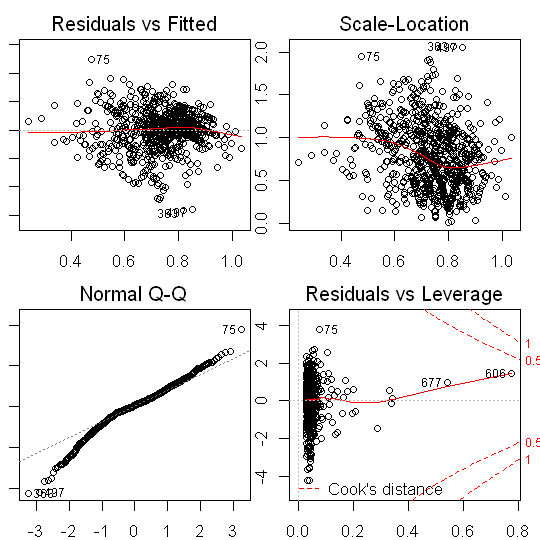

In [39]:
start <- Sys.time()
model3 <- lm(actual_prod~. + sqrt(smv) + log(wip+1) + sqrt(over_time) + log(incentive+1), train)
end <- Sys.time()
time3 <- end-start
summary(model3)
plot_diagnosis(model3)

1. Both R2 and adjusted R2 increase. Model3 fits the data better than model1 and 2.
2. Additional 3.7% variance explained.
2. The is small decrease in RSE.
3. The F-statistics increases from 14.5 to 15 with 4 more predictors, indicating there are still many predictors exhibiting low statistical significance. Hence, removing those predictors is necessary.

The backward stepwise selection is being used to automatically choose the most significant predictors,. The criteria applied is AIC (Akaike information criterion). As increasing the number of predictos almost always improves the goodness of the fit (which is one of the reason why R2 increases), AIC penalizes model complexity and avoid overfitting. 

Start:  AIC=-3291.95
actual_prod ~ quarter + department + day + team + targeted_prod + 
    smv + wip + over_time + incentive + idle_time + idle_men + 
    n_change + n_worker + month + sin_mday + cos_mday + sqrt(smv) + 
    log(wip + 1) + sqrt(over_time) + log(incentive + 1)

                     Df Sum of Sq    RSS     AIC
- day                 5   0.05957 14.993 -3298.6
- n_change            1   0.00013 14.934 -3293.9
- wip                 1   0.00215 14.935 -3293.8
- log(wip + 1)        1   0.00338 14.937 -3293.8
- cos_mday            1   0.00615 14.940 -3293.6
<none>                            14.933 -3292.0
- idle_time           1   0.04129 14.975 -3291.6
- sqrt(over_time)     1   0.04539 14.979 -3291.4
- incentive           1   0.09505 15.028 -3288.6
- over_time           1   0.11934 15.053 -3287.3
- sin_mday            1   0.13632 15.070 -3286.3
- idle_men            1   0.14551 15.079 -3285.8
- quarter             4   0.26375 15.197 -3285.3
- month               2   0.22515 15


Call:
lm(formula = step(model3), data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57576 -0.05994  0.00665  0.07927  0.48789 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2.442e-01  1.162e-01  -2.101 0.035979 *  
quarterQuarter2     4.643e-03  1.300e-02   0.357 0.721180    
quarterQuarter3     3.102e-02  2.564e-02   1.210 0.226648    
quarterQuarter4     5.226e-02  3.300e-02   1.584 0.113671    
quarterQuarter5     1.099e-01  3.132e-02   3.510 0.000472 ***
departmentsweing   -4.767e-01  6.330e-02  -7.531 1.35e-13 ***
team2              -1.236e-02  2.243e-02  -0.551 0.581547    
team3               1.457e-03  2.347e-02   0.062 0.950526    
team4              -1.230e-02  2.249e-02  -0.547 0.584586    
team5              -1.003e-02  2.372e-02  -0.423 0.672570    
team6              -4.863e-02  2.712e-02  -1.794 0.073264 .  
team7              -6.752e-02  2.413e-02  -2.798 0.005259 ** 
team8              -6.015e-

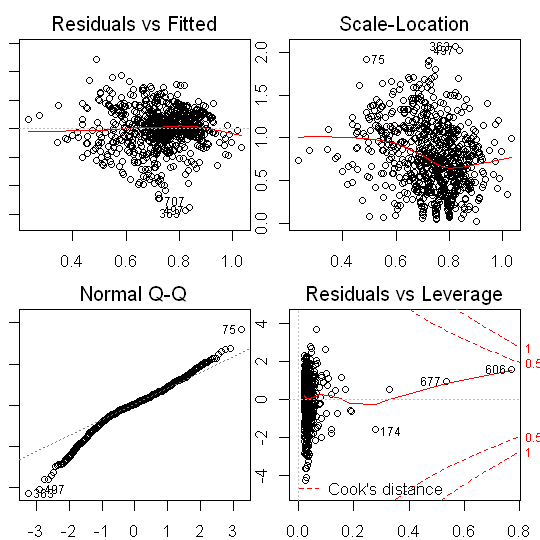

In [40]:
start <- Sys.time()
model3 <- lm(step(model3), train)
end <- Sys.time()
time3 <- end-start
summary(model3)
plot_diagnosis(model3)

1. 11 predictors are removed such as log(wip) which has a p-value of 0.67.
2. F-statistic increases with number of predictor decreases. This means the model achieve closer relationship with the response variable.
3. However, there is no improvement in linearity.

In [41]:
anova(model1, model2)
anova(model2, model3)
anova(model1, model3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
802,16.85714,NA,NA,NA,NA
802,15.88080,0,0.9763426,NA,NA


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
802,15.88080,NA,NA,NA,NA
807,15.01172,-5,0.8690795,NA,NA


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
802,16.85714,NA,NA,NA,NA
807,15.01172,-5,1.845422,NA,NA


The ANOVA test (ANalysis Of VAriance) test the statistical significance between different groups. The results show difference between model1, model2, and model3 is not statistically significant. Since the interactions between the predictors to the response variable were visualized, it will be tested to investigate if can bring any statistical significance.

In [42]:
anova(model1, lm(actual_prod~. + incentive:team, train))
anova(model2, lm(actual_prod~. + log(incentive+1) + log(incentive+1):team, train))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
802,16.85714,NA,NA,NA,NA
791,15.54004,11,1.3171,6.094674,1.219432e-09


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
802,15.88080,NA,NA,NA,NA
790,14.52509,12,1.355713,6.144619,2.138608e-10


The ANOVA tests were carried out. The examples chosen (including both original and transformed) are the strong interactions as observed in EDA. The results show that interaction effects (strong interaction) have statistical significance on the model, indicated by the p-value.

### 4.7 Model4

It is seen that adding transformation improves model fitness, hence the model will be developed using the transformed predictors and their corresponding interactions.

In [43]:
set.seed(123)
split <- sample(1:nrow(transformed_data), 0.7*nrow(transformed_data))
t_train <- transformed_data[split,]
t_test  <- transformed_data[-split,]

The approach here is that:
1. Adding all the strong interactions as observed in EDA.
2. Applying stepwise selection to remove statistically insignificant predictors or interactions.


Call:
lm(formula = actual_prod ~ . + quarter:smv + quarter:over_time + 
    quarter:n_change + quarter:sqrt_smv + quarter:log_wip + quarter:sqrt_over_time + 
    department:targeted_prod + department:smv + department:wip + 
    department:over_time + department:incentive + department:idle_time + 
    department:idle_men + department:n_change + department:n_worker + 
    department:sqrt_smv + department:log_wip + department:sqrt_over_time + 
    department:log_incentive + day:wip + day:incentive + day:idle_time + 
    day:idle_men + day:n_change + day:log_wip + day:sqrt_over_time + 
    day:log_incentive + team:targeted_prod + team:smv + team:wip + 
    team:over_time + team:incentive + team:idle_time + team:idle_men + 
    team:n_change + team:sin_mday + team:cos_mday + team:sqrt_smv + 
    team:log_wip + team:sqrt_over_time + team:log_incentive + 
    month:targeted_prod + month:smv + month:over_time + month:incentive + 
    month:n_change + month:n_worker + month:cos_mday + month:sq

Warning message:
"not plotting observations with leverage one:
  25, 31, 174, 175, 192, 405, 606, 700, 708, 734, 754, 756, 794, 815"Warning message:
"not plotting observations with leverage one:
  25, 31, 174, 175, 192, 405, 606, 700, 708, 734, 754, 756, 794, 815"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

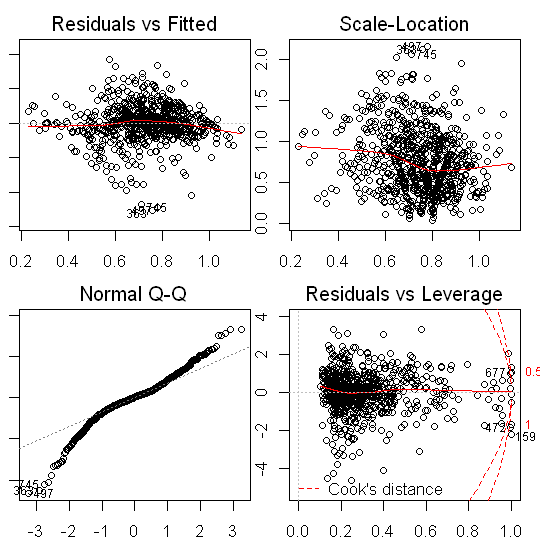

In [44]:
start <- Sys.time()
model4 <- lm(actual_prod~. +
             quarter:smv + quarter:over_time + quarter:n_change +
             quarter:sqrt_smv + quarter:log_wip + quarter:sqrt_over_time +
             department:targeted_prod + department:smv + department:wip +
             department:over_time + department:incentive + department:idle_time +
             department:idle_men + department:n_change + department:n_worker +
             department: sqrt_smv + department:log_wip + department:sqrt_over_time + department:log_incentive +
             day:wip + day:incentive + day:idle_time + day:idle_men + day:n_change +
             day:log_wip + day:sqrt_over_time + day:log_incentive +
             team:targeted_prod + team:smv + team:wip + team:over_time + team:incentive +
             team:idle_time + team:idle_men + team:n_change + team:sin_mday + team:cos_mday +
             team:sqrt_smv + team:log_wip + team:sqrt_over_time + team:log_incentive +
             month:targeted_prod + month:smv + month:over_time + month:incentive + month:n_change +
             month:n_worker + month:cos_mday + month:sqrt_smv + month:log_wip + month:sqrt_over_time +
             month:log_incentive, t_train)
end <- Sys.time()
time4 <- end-start
summary(model4)
plot_diagnosis(model4)

1. Due to adding many interactions, R2 increase. However, the low F-statistic and high predictors number means the model has very little relationship with the response variable, which is not desired.
2. The RSE reduces to 0.1218. However, there are a number of potential influential outliers appear on the residuals-vs-leverage plot, and all the data moves away from the Cook' distance. This could mean the model overfits, that it tries to fit many of undesired influential outliers brought by some interactions.

The function used for subset selection is adopted from tutorial. It plots both forward and backward stepwise selections, and includes the BIC (Bayesian information criterion) which performs a stricter selection than AIC.

In [45]:
subset_selection <- function(model, mode, nvmax){
    options(repr.plot.width=6, repr.plot.height=4.5)
    regfit <- regsubsets(formula(model), data = t_train, nvmax = nvmax, method = mode)
    reg.summary <- summary(regfit)

    par(mfrow = c(2, 2), mar=c(4,5,3,5))
    plot(reg.summary$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
    points(which.min(reg.summary$cp), reg.summary$cp[which.min(reg.summary$cp)], col = "orange", cex = 2, pch = 20)
    plot(reg.summary$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
    points(which.min(reg.summary$bic), reg.summary$bic[which.min(reg.summary$bic)], col = "orange", cex = 2, pch = 20)
    plot(reg.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
    points(which.max(reg.summary$adjr2), reg.summary$adjr2[which.max(reg.summary$adjr2)], col = "orange", cex = 2, pch = 20)
    plot(reg.summary$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
}

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"26  linear dependencies found"

Reordering variables and trying again:


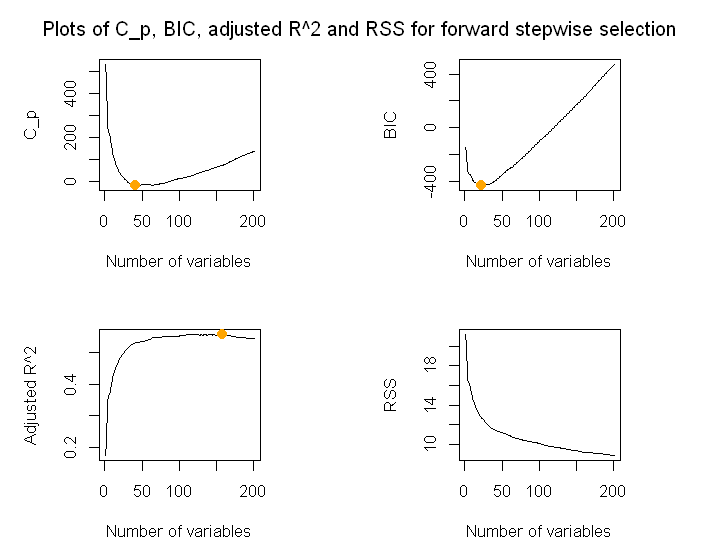

In [46]:
#plot for forward
subset_selection(model4, 'forward', nvmax=200)
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for forward stepwise selection", side = 3, line = -2, outer = TRUE)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"26  linear dependencies found"

Reordering variables and trying again:


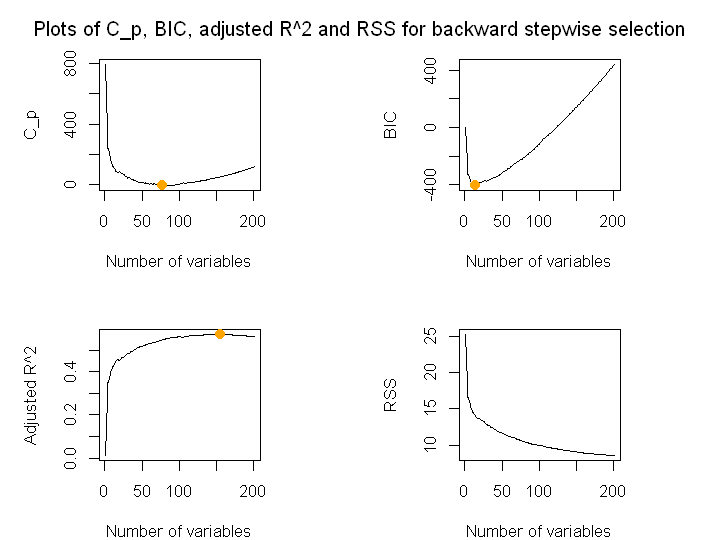

In [47]:
#plot for backward
subset_selection(model4, 'backward', nvmax=200)
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for backward stepwise selection", side = 3, line = -2, outer = TRUE)

In both forward and backward selection, BIC indicates that less than 50 predictors is needed, while more than 100 predictors are needed to achieve the maximum adjusted R2. However, when number of predictors reaches around 50, adjusted R2 starts to converge to its maximum. The minimum Mallows' Cp values, which assesses the fitness of the regression model for given sets of predictors, for both forward and backward are also achieved by the number of predictors around 50. This may implies that a subset of predictors that gives highest R2 may nnot be the best model.

### 4.8 Model5

Model5 will be using a BIC forward stepwise selection. The selection will start with 1 predictor and end with the full model of model4.

Start:  AIC=-2915.43
actual_prod ~ quarter

                 Df Sum of Sq    RSS     AIC
+ targeted_prod   1    4.1769 20.514 -3063.8
+ idle_men        1    0.7942 23.897 -2936.1
+ n_change        1    0.6770 24.014 -2932.0
+ log_incentive   1    0.6597 24.031 -2931.4
+ log_wip         1    0.4839 24.207 -2925.3
+ smv             1    0.3814 24.309 -2921.7
+ sqrt_smv        1    0.2808 24.410 -2918.3
+ team           11    2.1561 22.535 -2917.9
+ department      1    0.2183 24.473 -2916.1
<none>                        24.691 -2915.4
+ wip             1    0.1960 24.495 -2915.4
+ incentive       1    0.1795 24.511 -2914.8
+ sin_mday        1    0.1450 24.546 -2913.6
+ n_worker        1    0.1070 24.584 -2912.3
+ idle_time       1    0.1027 24.588 -2912.2
+ sqrt_over_time  1    0.0920 24.599 -2911.8
+ over_time       1    0.0644 24.627 -2910.9
+ month           2    0.2058 24.485 -2909.0
+ cos_mday        1    0.0003 24.691 -2908.7
+ day             5    0.1144 24.576 -2885.7

Step:  AIC


Call:
lm(formula = formula(step), data = t_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60793 -0.05117  0.00616  0.07844  0.37736 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -0.1795637  0.1036996  -1.732 0.083726 .  
quarterQuarter2                 0.0056309  0.0124328   0.453 0.650736    
quarterQuarter3                 0.0359386  0.0244793   1.468 0.142455    
quarterQuarter4                 0.0565429  0.0315749   1.791 0.073702 .  
quarterQuarter5                 0.1225074  0.0299880   4.085 4.84e-05 ***
targeted_prod                   0.2319229  0.0735937   3.151 0.001684 ** 
idle_men                       -0.0043617  0.0014287  -3.053 0.002339 ** 
log_incentive                   0.0058110  0.0072343   0.803 0.422053    
departmentsweing               -0.8245149  0.0912604  -9.035  < 2e-16 ***
n_worker                        0.0145620  0.0018009   8.086 2.21e-15 ***
smv             

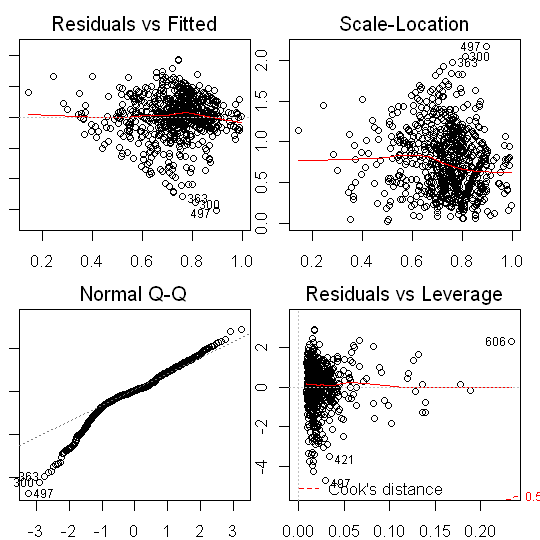

In [48]:
start <- Sys.time()
temp <- lm(actual_prod~quarter, t_train) #lower scope of forward stepwise selection
step <- step(temp, direction="forward", scope=list(lower=temp, upper=model4), k=log(nrow(t_train)))
model5 <- lm(formula(step), t_train)
end <- Sys.time()
time5 <- end-start
summary(model5)
plot_diagnosis(model5)

1. The result shows that many of the interactions are removed. Only 'targeted_prod:departmentsweing', 'departmentsweing:n_worker', and 'log_incentive:departmentsweing' are left, and they exhibit high statistical significance with p-values much lower than 0.01.
2. Other predictors such as 'targeted_prod' and 'smv' are kept as they exhibit relatively strong correlation with the response variable.
3. The number of predictors is reduced to 18 while the F-statistic is 37.6 indicating the relationship of this model is high.
4. RSE and adjusted R2 do not differ to much. The prediction power still needs to be improved.
5. The residuals-vs-leverage plot looks better than the one of model4. There is no potential influential outlier.

### 4.9 Model6

As it is shown that the BIC selection penalizes many predcitors, in order to address this, AIC backward stepwise selection will be applied to model6. It will start from the full model of model4 and substract the predictors gradually one-by-one.

Start:  AIC=-3312.15
actual_prod ~ quarter + department + day + team + targeted_prod + 
    smv + wip + over_time + incentive + idle_time + idle_men + 
    n_change + n_worker + month + sin_mday + cos_mday + sqrt_smv + 
    log_wip + sqrt_over_time + log_incentive + quarter:smv + 
    quarter:over_time + quarter:n_change + quarter:sqrt_smv + 
    quarter:log_wip + quarter:sqrt_over_time + department:targeted_prod + 
    department:smv + department:wip + department:over_time + 
    department:incentive + department:idle_time + department:idle_men + 
    department:n_change + department:n_worker + department:sqrt_smv + 
    department:log_wip + department:sqrt_over_time + department:log_incentive + 
    day:wip + day:incentive + day:idle_time + day:idle_men + 
    day:n_change + day:log_wip + day:sqrt_over_time + day:log_incentive + 
    team:targeted_prod + team:smv + team:wip + team:over_time + 
    team:incentive + team:idle_time + team:idle_men + team:n_change + 
    team:sin_mday + 


Call:
lm(formula = step(model4), data = t_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61660 -0.03807  0.00445  0.04990  0.40123 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -9.558e-01  1.062e+00  -0.900 0.368520    
quarterQuarter2                -8.562e-02  6.962e-02  -1.230 0.219142    
quarterQuarter3                 8.055e-02  7.974e-02   1.010 0.312729    
quarterQuarter4                -1.032e-01  8.850e-02  -1.166 0.243950    
quarterQuarter5                 4.875e-01  1.842e-01   2.646 0.008314 ** 
departmentsweing                1.259e+00  1.062e+00   1.186 0.236119    
team2                          -1.268e-01  5.211e-02  -2.433 0.015188 *  
team3                           1.873e-02  6.098e-02   0.307 0.758822    
team4                          -1.015e-01  5.424e-02  -1.872 0.061562 .  
team5                          -2.444e-02  5.951e-02  -0.411 0.681418    
team6            

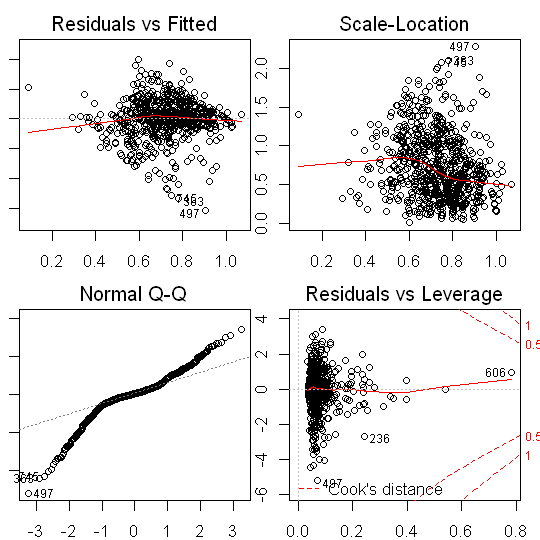

In [49]:
start <- Sys.time()
model6 <- lm(step(model4), t_train) #without specifying anything the direction is backward
end <- Sys.time()
time6 <- end-start
summary(model6)
plot_diagnosis(model6)

1. Number of predictors increases from 18 to 59 with F-statistics decreases from 37 to 15, which is expected. It is hardly to get a balance between there two numbers as there lacks linearity within. However, 15 is much larger than 1 meaning that the model still has certain degree of relationship with the response.
2. As observed that most of the attributes and their corresponding interactions are kept in the AIC selection compared to BIC selection. 
3. Predictors such as 'targeted_prod' and 'smv' matches their correlation analysis in EDA, where their positive and negative correlations to the response are also indicated respectively by their positive and negative coefficients.
4. Attributes 'wip' is excluded from the model, and 'log(wip)' is included instead. This matches the EDA as 'log(wip)' highly reduces the skewness.
5. The coefficients of 'over_time' and 'incentive' are much lower than the others as expected., due to their high magnitudes in nature.
6. 'n_worker' has positive coefficient and is highly statistically significant. This is opposite to the observation in EDA. However, as adding/removing predictors can alter the effect of one variable on the response variable.
7. The interation 'department:incnetive' is highly statistically significant given that its p-value is much less than 0.01. It also matches the EDA observation, as the plot shows the the two regression lines are nearly orthogonal.
8. The 4 plots are normal compared to previous models except model4.
9. The R2 improved to 0.5443 meaning more than half of the variance can be explained. The adjusted R2 also achieves slightly above 0.5. This indicates that the model fits the data better than the previous models.
10. However, the RSE is 0.1227 and it is about 0.02 lower than the first model. Additional measurement will be considered to reduce the RSE.

In [50]:
#compute the 95% CI
head(confint(model6, level = 0.95), 10)

,2.5 %,97.5 %
(Intercept),-3.04120953,1.129513082
quarterQuarter2,-0.22228649,0.051046996
quarterQuarter3,-0.07597937,0.237078829
quarterQuarter4,-0.27693856,0.070535357
quarterQuarter5,0.12579952,0.849118949
departmentsweing,-0.82565161,3.344283430
team2,-0.22906856,-0.024502057
team3,-0.10097385,0.138431333
team4,-0.20800150,0.004928683
team5,-0.14124772,0.092372144


Here shows the first 10 95%confident interval of the coefficients. It means that 95% of the time, the coefficients obtained for each predictors will be within this ranges.

In [51]:
anova(model4, model5, model6)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
571,8.474426,NA,NA,NA,NA
818,14.029343,-247,-5.554918,1.515327,3.644843e-05
777,11.688508,41,2.340835,3.846917,2.322666e-13


The ANOVA compares model4, model5, and model6. It shows that the change in model 6 is much more statistically significant, indicated by its very small p-value.

### 4.10 Model6.1

As there were a large amount of extreme values observed in EDA, it is wondered if there is any points that can be removed to impprove the regression. Hence, a model based on model6 aftering removing potential outliers will be developed.

     rstudent unadjusted p-value Bonferroni p
497 -5.298940         1.5190e-07   0.00012714
363 -4.498283         7.8980e-06   0.00661070
745 -4.363487         1.4531e-05   0.01216300
421 -4.096395         4.6373e-05   0.03881400

,StudRes,Hat,CookD
236,-2.668430986,0.24110799,3.740974e-02
363,-4.498282504,0.04281462,1.472035e-02
497,-5.298940171,0.06853921,3.327543e-02
606,0.984136616,0.78224015,5.798817e-02
677,0.003957291,0.54127531,3.083686e-07


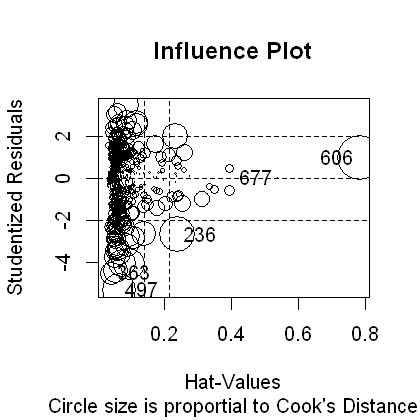

In [52]:
#test for outliers and influential points
outlierTest(model6, cutoff=0.05, digits = 1)
options(repr.plot.width=3.5, repr.plot.height=3.5)
influencePlot(model6, scale=5, main="Influence Plot", sub="Circle size is proportial to Cook's Distance" )

The outlier test results in 4 outliers, of which the Bonferroni p-value is less than 0.05. However, only point 363 and point 497 are influential as showned by the influence plot. If looking back at the residual-vs-leverage plot above, point 497 almost touch the lower red-dashed line. These two points will be removed, and the training on model6 will be performed again.

In [53]:
t_train[c(300, 497),]

quarter,department,day,team,targeted_prod,smv,wip,over_time,incentive,idle_time,...,n_change,n_worker,month,sin_mday,cos_mday,actual_prod,sqrt_smv,log_wip,sqrt_over_time,log_incentive
Quarter3,finishing,1,7,0.70,4.15,2103,1800,0,0,...,0,15,2,-0.1011683,-0.9948693,0.2580000,2.037155,7.651596,42.42641,0
Quarter3,finishing,7,4,0.75,4.15,1688,2400,0,0,...,0,20,2,0.1011683,-0.9948693,0.2870417,2.037155,7.431892,48.98979,0



Call:
lm(formula = formula(model6), data = dummy)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52002 -0.03769  0.00315  0.04914  0.39868 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -1.553e+00  1.037e+00  -1.498 0.134581    
quarterQuarter2                -8.699e-02  6.768e-02  -1.285 0.199029    
quarterQuarter3                 8.977e-02  7.753e-02   1.158 0.247286    
quarterQuarter4                -8.960e-02  8.606e-02  -1.041 0.298101    
quarterQuarter5                 5.198e-01  1.792e-01   2.901 0.003821 ** 
departmentsweing                1.868e+00  1.037e+00   1.802 0.072006 .  
team2                          -1.282e-01  5.065e-02  -2.531 0.011587 *  
team3                           2.774e-02  5.929e-02   0.468 0.639962    
team4                          -7.243e-02  5.299e-02  -1.367 0.172022    
team5                          -1.866e-02  5.785e-02  -0.323 0.747061    
team6           

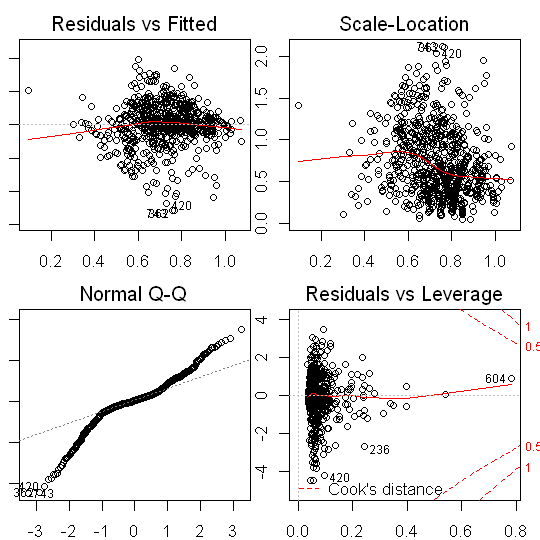

In [54]:
dummy <- t_train[c(-300, -497),] #remove the influential outliers
start <- Sys.time()
model6.1 <- lm(formula(model6), dummy)
end <- Sys.time()
time6.1 <- end-start
summary(model6.1)
plot_diagnosis(model6.1)

1. Both R2 and adjusted R2 have increased.
2. F-statistic also increases.
3. There is slight reduction on RSE.

Removing the two points has made the model look better. However, it is hardly to conclude that it predicts better at this stage.

## 5. Results and discussion <a class="anchor" id="sec_6"></a>

### 5.1 Terminology

1. Root-mean-squared error: $RMSE=\sqrt{\frac{1}{n}\sum_{n}^{i=1}(y_i-\hat{y_i})^2}$ measures the error between predicted values and actual values in nonlinear scope.
2. Mean absolute error: $MAE=\frac{1}{n}|y_i-\hat{y_i}|$ easures the error between predicted values and actual values in linear scope.
3. R2: the test R2 (compared between test data and predicted values).
4. p: number of predictors
5. Processing time: time taken to run the model.

### 5.2 Results Summary

**Summary description for each model:**
1. Model1:   Basic model that uses all 4 attributes.
2. Model2:   Replacing some original attributes by their transformed forms.
3. Model3:   Including both origianl and transformed attributes.
4. Model4:   Adding most of the strong interactions observed in EDA to model3.
5. Model5:   Applying BIC forward stepwise selection on model4.
6. Model6:   Applying AIC backward stepwise selection on model4.
7. Model6.1: Re-training model6 after removing influential outliers.

No id variables; using all as measure variables
Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."

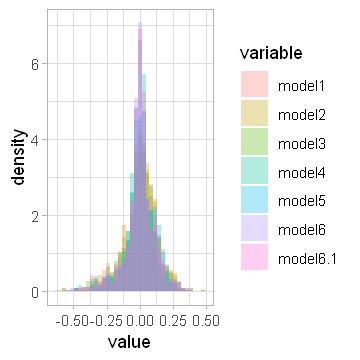

In [55]:
#plot the residual histogram for each model
residual <- data.frame(matrix(3, length(resid(model1)))) #pre-define dataframe dimension

residual$model1 <- resid(model1)
residual$model2 <- resid(model2)
residual$model3 <- resid(model3)
residual$model4 <- resid(model4)
residual$model5 <- resid(model5)
residual$model6 <- resid(model6)
residual$model6.1 <- c(resid(model6.1), rep(NA, nrow(residual)-length(resid(model6.1))))

residual <- melt(residual[-1]) #convert from wide to long

options(repr.plot.width=3, repr.plot.height=3)
ggplot(residual, aes(x=value, fill=variable)) + 
geom_histogram(alpha = 0.3, aes(y = ..density..), position = 'identity', binwidth=.03) + theme_light()

The histogram shows the distributions of residuals of each model. It shows that all the residuals are not normally distributed, and they exhibit left skewness. Some models such as model6 and model6.1 exhibits large kurtosis, which is also shown by the normal-qq plots where the lower tails are away from the dashed line. The skewness and kurtosis may also indicate that there are outliers exist within the data. This matches the observation above. The distributions of residuals may breach the assumption of linear regression that residuals are nearly normally distributed and independent.

In [56]:
#compute the parameters to compare models
accuracy <- data.frame(matrix(3, 7))

#RMSE
accuracy$RMSE <- round(c(rmse(model1, test), rmse(model2, test), rmse(model3, test),
                   rmse(model4, t_test), rmse(model5, t_test), rmse(model6, t_test), rmse(model6.1, t_test)), 6)
#MAE
accuracy$MAE <- round(c(mae(model1, test), mae(model2, test), mae(model3, test),
                   mae(model4, t_test), mae(model5, t_test), mae(model6, t_test), mae(model6.1, t_test)), 6)
#R2
accuracy$R2 <- round(c(rsquare(model1, test), rsquare(model2, test), rsquare(model3, test),
                   rsquare(model4, t_test), rsquare(model5, t_test), rsquare(model6, t_test), rsquare(model6.1, t_test)), 3)
#number of predictors
accuracy$p <- c(length(coefficients(model1))-1, length(coefficients(model2))-1, length(coefficients(model3))-1,
                         length(coefficients(model4))-1, length(coefficients(model5))-1, length(coefficients(model6))-1,
                         length(coefficients(model6.1))-1)
#f-statistic
accuracy$F_score <- round(c(as.numeric(summary(model1)$fstatistic[1]), as.numeric(summary(model2)$fstatistic[1]),
                     as.numeric(summary(model3)$fstatistic[1]), as.numeric(summary(model4)$fstatistic[1]),
                     as.numeric(summary(model5)$fstatistic[1]), as.numeric(summary(model6)$fstatistic[1]),
                     as.numeric(summary(model6.1)$fstatistic[1])), 1)
#processing time
accuracy$time <- round(as.numeric(c(time1, time2, time3, time4, time5, time6, time6+time6.1)), 3)

accuracy <- accuracy[-1]
row.names(accuracy) <- c('model1', 'model2', 'model3', 'model4', 'model5', 'model6', 'model6.1')
accuracy

Warning message in predict.lm(model, data):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model, data):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model, data):
"prediction from a rank-deficient fit may be misleading"

,RMSE,MAE,R2,p,F_score,time
model1,0.146025,0.102999,0.286,34,12.3,0.005
model2,0.141760,0.098258,0.327,34,14.5,0.016
model3,0.139893,0.096035,0.345,29,19.7,0.113
model4,0.547588,0.171632,-8.983,291,4.4,0.031
model5,0.133013,0.092083,0.408,18,37.6,0.339
model6,0.127126,0.079817,0.459,59,15.7,14.426
model6.1,0.126167,0.079766,0.468,59,16.9,14.426


1. In terms of RMSE, MAE, and R2, model6.1 is the best model followed by model6. 
2. The negative R2 of model4 indicates that the model wrongly fits the data.
3. Model5 has the lowest complexity and the strongest relationship with the response variable.
4. The processing time of model6 or model6.1 is much higher than the others. However, 16.6 seconds is still acceptable.
5. From model1 to model6.1 (exluding model4), the RMSE has reduced from 0.146 to 0.126, meaning the improvement is about 13%. While for MAE and R2, the improvements are 22.5% and 63.6% respectively.

In [57]:
#repeated k-fold cross-validation
set.seed(123)
train_control <- trainControl(method = 'repeatedcv', number = 10, repeats = 6)
cv.model <- train(formula(model6.1), data = dummy, method = "lm", trControl = train_control)
print(cv.model)

Linear Regression 

835 samples
 15 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 6 times) 
Summary of sample sizes: 751, 751, 752, 751, 752, 751, ... 
Resampling results:

  RMSE       Rsquared   MAE       
  0.1244711  0.4928941  0.08431977

Tuning parameter 'intercept' was held constant at a value of TRUE


The repeated K-fold cross-validation is performed on model6.1. The data is splitted into 10 folds and is repeated 6 times to cross-validate the above results. The validation results and the calculated results for model6.1 are close enough.

### 5.3 Result Discussion

As evidenced by the correlation test in EDA, the normal-qq plots and scale-location plots in the regression analysis, and the above residuals histogram, all the assumptions of linear regression are breached, meaning that linear regression model has limited power to fit and predict such data. Therefore, most of the attributes, their transformations, as well as their interactions were included in the model to improve the fitness. Given the above discussion, for the given dataset, the best R2 obtained at this stage is 0.468, which means about 46.8% of the variance can be explained by the model. Moreover, the RMSE and MAE are 0.126 and 0.080 respectively. As RMSE is sensitive to outliers and large errors, the 5% difference may implies there are a large amount of outliers (two outliers were removed from model6.1), which matches the observations in EDA. While  lean computation and lightweight implementation is preferred, using 59 predictors and spending 16 seonds computing time to achieve the 13% reduction in error is acceptable.

## 6. Conclusion<a class="anchor" id="sec_7"></a>

After performing EDA and regression analysis, it is concluded that the actual productivity cannot be accurately predicted using this set of data by linear regression. In the EDA session, it was suspected that there lacked in linearity between predictors and response variable, and a lot of extreme values were observed. Another interesting observation was that there maybe a serious interruption occurred in the sweing department during quarter 1 in Feburary 2015. In the regression analysis session, 5 plus 1 models were developed and tested. It also showed the lack of linearity. The effects of transformation and interaction were examined. Although they have limited power to improve the linearity within this data, it improves the model performance at some extent. Moreover, removing the influential outliers also slightly improve the prediction. In the future, nonlinear regression models can be tested if they fit this dataset better. However, if linear regression is insisted to be used due to its simplicity, increasing the sample size, either by collecting more data or performing resampling, can be considered.